In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

!pwd
!whoami
!date

/ihme/homes/ndbs/vivarium_research_ciff/nathaniel/model_validation/model2
ndbs
Fri Jul 23 16:15:19 PDT 2021


# 2.1: WASTING (CAUSE validation)

In [3]:
%cd /ihme/costeffectiveness/results/vivarium_ciff_sam/v2.1_gbd_2020_wasting_data/ciff_sam/2021_07_20_10_32_31/count_data
%ls

/ihme/costeffectiveness/results/vivarium_ciff_sam/v2.1_gbd_2020_wasting_data/ciff_sam/2021_07_20_10_32_31/count_data
deaths.csv                     population.csv                 ylds.csv
deaths.hdf                     population.hdf                 ylds.hdf
disease_state_person_time.csv  wasting_state_person_time.csv  ylls.csv
disease_state_person_time.hdf  wasting_state_person_time.hdf  ylls.hdf
disease_transition_count.csv   wasting_transition_count.csv
disease_transition_count.hdf   wasting_transition_count.hdf


In [4]:
#make directory to store outputs

#%mkdir /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting

In [5]:
# master_dir = '/home/j/Project/simulation_science/ciff_malnutrition/'
master_dir = '/share/scratch/users/ndbs/vivarium_results/ciff_malnutrition/'
sim_result_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v2.1_gbd_2020_wasting_data/ciff_sam/2021_07_20_10_32_31/count_data/'
output_dir = master_dir + f'verification_and_validation/v2.1_gbd_2020_wasting/'

In [6]:
deaths_explore = pd.read_csv(sim_result_dir + 'deaths.csv')
deaths_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'moderate_acute_malnutrition', 'other_causes',
       'severe_acute_malnutrition'], dtype=object)

In [7]:
deaths_explore.input_draw.nunique()

12

In [8]:
deaths_explore.input_draw.unique()

array([ 29, 223, 232, 357, 394, 524, 602, 629, 650, 680, 829, 946])

In [9]:
deaths_explore.sex.unique()

array(['female', 'male'], dtype=object)

In [10]:
deaths_explore.year.unique()

array([2022, 2023, 2024, 2025, 2026])

In [11]:
deaths_explore.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [12]:
deaths_explore.head()

Unnamed: 0     sex  year               cause measure  input_draw  scenario  \
0           0  female  2022  diarrheal_diseases   death          29  baseline   
1           1  female  2022  diarrheal_diseases   death          29  baseline   
2           2  female  2022  diarrheal_diseases   death          29  baseline   
3           3  female  2022  diarrheal_diseases   death          29  baseline   
4           4  female  2022  diarrheal_diseases   death          29  baseline   

   value                 wasting_state             age  
0    1.0  susceptible_to_child_wasting  early_neonatal  
1    0.0            mild_child_wasting  early_neonatal  
2    0.0   moderate_acute_malnutrition  early_neonatal  
3    0.0     severe_acute_malnutrition  early_neonatal  
4    9.0  susceptible_to_child_wasting   late_neonatal

In [13]:
#check with rajan how people are born

pt_explore = pd.read_csv(sim_result_dir + 'population.csv')
pt_explore

Unnamed: 0                     measure  input_draw  scenario      value
0            0            total_population          29  baseline  1169038.0
1            1            total_population         223  baseline  1169805.0
2            2            total_population         232  baseline  1168973.0
3            3            total_population         357  baseline  1168712.0
4            4            total_population         394  baseline  1169436.0
..         ...                         ...         ...       ...        ...
55          55  total_population_untracked         629  baseline        0.0
56          56  total_population_untracked         650  baseline        0.0
57          57  total_population_untracked         680  baseline        0.0
58          58  total_population_untracked         829  baseline        0.0
59          59  total_population_untracked         946  baseline        0.0

[60 rows x 5 columns]

In [14]:
pt_explore.groupby('measure').sum()

Unnamed: 0  input_draw       value
measure                                                       
total_population                    66        6095  14028499.0
total_population_dead              210        6095    297228.0
total_population_living            354        6095  13731271.0
total_population_tracked           498        6095  14028499.0
total_population_untracked         642        6095         0.0

In [15]:
# and then this one is just time spend in each wasting state, not stratified on cause. 

wasting_pt_explore = pd.read_csv(sim_result_dir + 'wasting_state_person_time.csv')
wasting_pt_explore

Unnamed: 0     sex  year                         cause  \
0              0  female  2022            mild_child_wasting   
1              1  female  2022            mild_child_wasting   
2              2  female  2022            mild_child_wasting   
3              3  female  2022            mild_child_wasting   
4              4  female  2022            mild_child_wasting   
...          ...     ...   ...                           ...   
2875        2875    male  2026  susceptible_to_child_wasting   
2876        2876    male  2026  susceptible_to_child_wasting   
2877        2877    male  2026  susceptible_to_child_wasting   
2878        2878    male  2026  susceptible_to_child_wasting   
2879        2879    male  2026  susceptible_to_child_wasting   

                measure  input_draw  scenario         value              age  
0     state_person_time          29  baseline      4.616016   early_neonatal  
1     state_person_time          29  baseline     62.956879    late_neonatal  
2     state_person_time          29  baseline   2653.240246       1-5_months  
3     state_person_time          29  baseline   7885.367556      6-11_months  
4     state_person_time          29  baseline  20853.418207  12_to_23_months  
...                 ...         ...       ...           ...              ...  
2875  state_person_time         946  baseline    957.210130    late_neonatal  
2876  state_person_time         946  baseline   6839.600274       1-5_months  
2877  state_person_time         946  baseline   7743.716632      6-11_months  
2878  state_person_time         946  baseline  14421.379877  12_to_23_months  
2879  state_person_time         946  baseline  68508.800821           2_to_4  

[2880 rows x 9 columns]

-----------------------------------------------------------------------------------------------------------------------

In [16]:
# this one is showing sims who are, i.e., infected with diarrheal_diseases, and susceptible_to_child_wasting; most stratified person-time

disease_pt_explore = pd.read_csv(sim_result_dir + 'disease_state_person_time.csv')
disease_pt_explore

#6 ages, 2 sexes, 5 years, 6 causes, 4 wasting, 12 draws

Unnamed: 0     sex  year                   cause            measure  \
0               0  female  2022      diarrheal_diseases  state_person_time   
1               1  female  2022      diarrheal_diseases  state_person_time   
2               2  female  2022      diarrheal_diseases  state_person_time   
3               3  female  2022      diarrheal_diseases  state_person_time   
4               4  female  2022      diarrheal_diseases  state_person_time   
...           ...     ...   ...                     ...                ...   
17275       17275    male  2026  susceptible_to_measles  state_person_time   
17276       17276    male  2026  susceptible_to_measles  state_person_time   
17277       17277    male  2026  susceptible_to_measles  state_person_time   
17278       17278    male  2026  susceptible_to_measles  state_person_time   
17279       17279    male  2026  susceptible_to_measles  state_person_time   

       input_draw  scenario         value                 wasting_state  \
0              29  baseline      4.527036  susceptible_to_child_wasting   
1              29  baseline      0.119097            mild_child_wasting   
2              29  baseline      0.047912   moderate_acute_malnutrition   
3              29  baseline      0.012320     severe_acute_malnutrition   
4              29  baseline     32.488706  susceptible_to_child_wasting   
...           ...       ...           ...                           ...   
17275         946  baseline    102.134155     severe_acute_malnutrition   
17276         946  baseline  43321.197810  susceptible_to_child_wasting   
17277         946  baseline  11233.806982            mild_child_wasting   
17278         946  baseline   3897.321013   moderate_acute_malnutrition   
17279         946  baseline    807.096509     severe_acute_malnutrition   

                   age  
0       early_neonatal  
1       early_neonatal  
2       early_neonatal  
3       early_neonatal  
4        late_neonatal  
...                ...  
17275  12_to_23_months  
17276           2_to_4  
17277           2_to_4  
17278           2_to_4  
17279           2_to_4  

[17280 rows x 10 columns]

In [17]:
total_pt = disease_pt_explore.value.sum()
total_pt

66544565.80698153

In [18]:
# looks like all 4x6 unique combos
disease_pt_explore[['cause','wasting_state']].drop_duplicates()

cause  \
0                              diarrheal_diseases   
1                              diarrheal_diseases   
2                              diarrheal_diseases   
3                              diarrheal_diseases   
288                  lower_respiratory_infections   
...                                           ...   
1155  susceptible_to_lower_respiratory_infections   
1440                       susceptible_to_measles   
1441                       susceptible_to_measles   
1442                       susceptible_to_measles   
1443                       susceptible_to_measles   

                     wasting_state  
0     susceptible_to_child_wasting  
1               mild_child_wasting  
2      moderate_acute_malnutrition  
3        severe_acute_malnutrition  
288   susceptible_to_child_wasting  
...                            ...  
1155     severe_acute_malnutrition  
1440  susceptible_to_child_wasting  
1441            mild_child_wasting  
1442   moderate_acute_malnutrition  
1443     severe_acute_malnutrition  

[24 rows x 2 columns]

In [19]:
disease_pt_explore.year.unique()

array([2022, 2023, 2024, 2025, 2026])

In [20]:
disease_pt_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [21]:
disease_pt_explore.wasting_state.unique()

array(['susceptible_to_child_wasting', 'mild_child_wasting',
       'moderate_acute_malnutrition', 'severe_acute_malnutrition'],
      dtype=object)

In [22]:
wasting_pt_explore.cause.unique()

array(['mild_child_wasting', 'moderate_acute_malnutrition',
       'severe_acute_malnutrition', 'susceptible_to_child_wasting'],
      dtype=object)

In [23]:
wasting_pt_explore

Unnamed: 0     sex  year                         cause  \
0              0  female  2022            mild_child_wasting   
1              1  female  2022            mild_child_wasting   
2              2  female  2022            mild_child_wasting   
3              3  female  2022            mild_child_wasting   
4              4  female  2022            mild_child_wasting   
...          ...     ...   ...                           ...   
2875        2875    male  2026  susceptible_to_child_wasting   
2876        2876    male  2026  susceptible_to_child_wasting   
2877        2877    male  2026  susceptible_to_child_wasting   
2878        2878    male  2026  susceptible_to_child_wasting   
2879        2879    male  2026  susceptible_to_child_wasting   

                measure  input_draw  scenario         value              age  
0     state_person_time          29  baseline      4.616016   early_neonatal  
1     state_person_time          29  baseline     62.956879    late_neonatal  
2     state_person_time          29  baseline   2653.240246       1-5_months  
3     state_person_time          29  baseline   7885.367556      6-11_months  
4     state_person_time          29  baseline  20853.418207  12_to_23_months  
...                 ...         ...       ...           ...              ...  
2875  state_person_time         946  baseline    957.210130    late_neonatal  
2876  state_person_time         946  baseline   6839.600274       1-5_months  
2877  state_person_time         946  baseline   7743.716632      6-11_months  
2878  state_person_time         946  baseline  14421.379877  12_to_23_months  
2879  state_person_time         946  baseline  68508.800821           2_to_4  

[2880 rows x 9 columns]

In [24]:
disease_pt_explore

Unnamed: 0     sex  year                   cause            measure  \
0               0  female  2022      diarrheal_diseases  state_person_time   
1               1  female  2022      diarrheal_diseases  state_person_time   
2               2  female  2022      diarrheal_diseases  state_person_time   
3               3  female  2022      diarrheal_diseases  state_person_time   
4               4  female  2022      diarrheal_diseases  state_person_time   
...           ...     ...   ...                     ...                ...   
17275       17275    male  2026  susceptible_to_measles  state_person_time   
17276       17276    male  2026  susceptible_to_measles  state_person_time   
17277       17277    male  2026  susceptible_to_measles  state_person_time   
17278       17278    male  2026  susceptible_to_measles  state_person_time   
17279       17279    male  2026  susceptible_to_measles  state_person_time   

       input_draw  scenario         value                 wasting_state  \
0              29  baseline      4.527036  susceptible_to_child_wasting   
1              29  baseline      0.119097            mild_child_wasting   
2              29  baseline      0.047912   moderate_acute_malnutrition   
3              29  baseline      0.012320     severe_acute_malnutrition   
4              29  baseline     32.488706  susceptible_to_child_wasting   
...           ...       ...           ...                           ...   
17275         946  baseline    102.134155     severe_acute_malnutrition   
17276         946  baseline  43321.197810  susceptible_to_child_wasting   
17277         946  baseline  11233.806982            mild_child_wasting   
17278         946  baseline   3897.321013   moderate_acute_malnutrition   
17279         946  baseline    807.096509     severe_acute_malnutrition   

                   age  
0       early_neonatal  
1       early_neonatal  
2       early_neonatal  
3       early_neonatal  
4        late_neonatal  
...                ...  
17275  12_to_23_months  
17276           2_to_4  
17277           2_to_4  
17278           2_to_4  
17279           2_to_4  

[17280 rows x 10 columns]

In [25]:
# shouldn't these be the same?

disease_pt_explore.loc[
    (disease_pt_explore.cause.isin(['diarrheal_diseases','susceptible_to_diarrheal_diseases']))].value.sum(), wasting_pt_explore.value.sum()

(22181521.935660504, 35226406.678987)

In [26]:
# shouldn't these be the same?

disease_pt_explore.loc[
    (disease_pt_explore.cause.isin(['measles','susceptible_to_measles']))].value.sum(), wasting_pt_explore.value.sum()

(22181521.935660504, 35226406.678987)

In [27]:
# shouldn't these be the same?

disease_pt_explore.loc[
    (disease_pt_explore.cause.isin(['lower_respiratory_infections','susceptible_to_lower_respiratory_infections']))].value.sum(), wasting_pt_explore.value.sum()

(22181521.935660504, 35226406.678987)

In [28]:
total_pt

66544565.80698153

In [29]:
# these are the same... why isn't sum(disease)/3 == sum(wasting)?

id_cols = ['sex','year','age']
disease_pt_explore[id_cols].drop_duplicates().shape, wasting_pt_explore[id_cols].drop_duplicates().shape

((60, 3), (60, 3))

In [30]:
disease_transition_explore = pd.read_csv(sim_result_dir + 'disease_transition_count.csv')
disease_transition_explore

Unnamed: 0     sex  year  \
0               0  female  2022   
1               1  female  2022   
2               2  female  2022   
3               3  female  2022   
4               4  female  2022   
...           ...     ...   ...   
17275       17275    male  2026   
17276       17276    male  2026   
17277       17277    male  2026   
17278       17278    male  2026   
17279       17279    male  2026   

                                                 measure  input_draw  \
0      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
1      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
2      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
3      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
4      diarrheal_diseases_to_susceptible_to_diarrheal...          29   
...                                                  ...         ...   
17275      susceptible_to_measles_to_measles_event_count         946   
17276      susceptible_to_measles_to_measles_event_count         946   
17277      susceptible_to_measles_to_measles_event_count         946   
17278      susceptible_to_measles_to_measles_event_count         946   
17279      susceptible_to_measles_to_measles_event_count         946   

       scenario   value                 wasting_state              age  
0      baseline   263.0  susceptible_to_child_wasting   early_neonatal  
1      baseline     2.0            mild_child_wasting   early_neonatal  
2      baseline     0.0   moderate_acute_malnutrition   early_neonatal  
3      baseline     0.0     severe_acute_malnutrition   early_neonatal  
4      baseline  1999.0  susceptible_to_child_wasting    late_neonatal  
...         ...     ...                           ...              ...  
17275  baseline     4.0     severe_acute_malnutrition  12_to_23_months  
17276  baseline   191.0  susceptible_to_child_wasting           2_to_4  
17277  baseline    54.0            mild_child_wasting           2_to_4  
17278  baseline    54.0   moderate_acute_malnutrition           2_to_4  
17279  baseline    33.0     severe_acute_malnutrition           2_to_4  

[17280 rows x 9 columns]

In [31]:
disease_transition_explore.measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

In [32]:
wasting_transition_explore = pd.read_csv(sim_result_dir + 'wasting_transition_count.csv')
wasting_transition_explore

Unnamed: 0     sex  year  \
0              0  female  2022   
1              1  female  2022   
2              2  female  2022   
3              3  female  2022   
4              4  female  2022   
...          ...     ...   ...   
5035        5035    male  2026   
5036        5036    male  2026   
5037        5037    male  2026   
5038        5038    male  2026   
5039        5039    male  2026   

                                                measure  input_draw  scenario  \
0     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
1     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
2     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
3     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
4     mild_child_wasting_to_moderate_acute_malnutrit...          29  baseline   
...                                                 ...         ...       ...   
5035  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
5036  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
5037  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
5038  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   
5039  susceptible_to_child_wasting_to_mild_child_was...         946  baseline   

        value              age  
0        10.0   early_neonatal  
1       170.0    late_neonatal  
2      8551.0       1-5_months  
3     25798.0      6-11_months  
4     59246.0  12_to_23_months  
...       ...              ...  
5035     72.0    late_neonatal  
5036    705.0       1-5_months  
5037    952.0      6-11_months  
5038   1707.0  12_to_23_months  
5039   7302.0           2_to_4  

[5040 rows x 8 columns]

In [33]:
# yep this is everything expected
wasting_transition_explore.measure.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
       'mild_child_wasting_to_susceptible_to_child_wasting_event_count',
       'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count',
       'severe_acute_malnutrition_to_mild_child_wasting_event_count',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count',
       'susceptible_to_child_wasting_to_mild_child_wasting_event_count'],
      dtype=object)

# Sim results

In [34]:
def load_sim_count_data(sim_result_dir: str):
    columns = ['age', 'sex', 'year', 'input_draw', 'scenario', 'measure']
    df = {}
    fnames = ['deaths', 'disease_transition_count', 'wasting_transition_count',
              'disease_state_person_time', 'wasting_state_person_time']
    for fname in fnames:
        df[fname] = pd.read_csv(sim_result_dir + fname + '.csv', index_col=0)
         
        # get aggregated results if stratifications exist
        if 'cause' in df[fname].columns:
            df[fname] = df[fname].groupby(columns + ['cause']).value.sum().reset_index()
        else:
            df[fname] = df[fname].groupby(columns).value.sum().reset_index()
        
                                
    return df

In [35]:
df = load_sim_count_data(sim_result_dir)

In [36]:
df['deaths']

age     sex  year  input_draw  scenario measure  \
0        1-5_months  female  2022          29  baseline   death   
1        1-5_months  female  2022          29  baseline   death   
2        1-5_months  female  2022          29  baseline   death   
3        1-5_months  female  2022          29  baseline   death   
4        1-5_months  female  2022          29  baseline   death   
...             ...     ...   ...         ...       ...     ...   
4315  late_neonatal    male  2026         946  baseline   death   
4316  late_neonatal    male  2026         946  baseline   death   
4317  late_neonatal    male  2026         946  baseline   death   
4318  late_neonatal    male  2026         946  baseline   death   
4319  late_neonatal    male  2026         946  baseline   death   

                             cause  value  
0               diarrheal_diseases   58.0  
1     lower_respiratory_infections   18.0  
2                          measles    1.0  
3      moderate_acute_malnutrition    0.0  
4                     other_causes   41.0  
...                            ...    ...  
4315  lower_respiratory_infections    8.0  
4316                       measles    0.0  
4317   moderate_acute_malnutrition    0.0  
4318                  other_causes   55.0  
4319     severe_acute_malnutrition    0.0  

[4320 rows x 8 columns]

### DEATH counts 

In [37]:
#deaths

deaths_count_dd = df['deaths'].query('cause == "diarrheal_diseases"')
deaths_count_lri = df['deaths'].query('cause == "lower_respiratory_infections"')
deaths_count_msls = df['deaths'].query('cause == "measles"')
deaths_count_others = df['deaths'].query('cause == "other_causes"')

total_deaths_count = (df['deaths']
                     .groupby(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure'])
                     .value.sum()
                     .reset_index())

total_deaths_count['cause'] = 'all_causes'

### cause incidence counts

In [38]:
df['disease_transition_count'].measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

In [39]:
#incidence counts 

#incident cases of diarrheal diseases: S to diarrhea
incidence_dd_count = (df['disease_transition_count'].query('measure == "susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count"'))
incidence_dd_count['cause'] = 'diarrheal_disease'
incidence_dd_count['measure'] = 'incidence'

#incident cases of lri: S to LRI
incidence_lri_count = (df['disease_transition_count'].query('measure == "susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count"'))
incidence_lri_count['cause'] = 'lri'
incidence_lri_count['measure'] = 'incidence'

#incident cases of lri: S to measles
incidence_msls_count = (df['disease_transition_count'].query('measure == "susceptible_to_measles_to_measles_event_count"'))
incidence_msls_count['cause'] = 'measles'
incidence_msls_count['measure'] = 'incidence'


In [40]:
# remission counts 

#incident cases of diarrheal diseases: S to diarrhea
remission_dd_count = (df['disease_transition_count']
                      .query('measure == "diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count"'))
remission_dd_count['cause'] = 'diarrheal_disease'
remission_dd_count['measure'] = 'remission'

#incident cases of lri: S to LRIb
remission_lri_count = (df['disease_transition_count']
                      .query('measure == "lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count"'))
remission_lri_count['cause'] = 'lri'
remission_lri_count['measure'] = 'remission'

#incident cases of lri: S to measles
remission_msls_count = (df['disease_transition_count']
                      .query('measure == "measles_to_susceptible_to_measles_event_count"'))
remission_msls_count['cause'] = 'measles'
remission_msls_count['measure'] = 'remission'


### disease state person-time

In [41]:
df['disease_state_person_time'].cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [42]:
person_time_dd = df['disease_state_person_time'].query('cause == "diarrheal_diseases"')
person_time_lri = df['disease_state_person_time'].query('cause == "lower_respiratory_infections"')
person_time_msls = df['disease_state_person_time'].query('cause == "measles"')

person_time_sus_dd = df['disease_state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['disease_state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['disease_state_person_time'].query('cause == "susceptible_to_measles"')

#person_time_pc['measure'] = 'prevalence'
#person_time_c['measure'] = 'prevalence'

In [43]:
## add total person time
df['person_time'] = df['disease_state_person_time'].loc[
    df['disease_state_person_time'].cause.isin(['diarrheal_diseases','susceptible_to_diarrheal_diseases'])
].groupby(['age','sex','year','input_draw','scenario','measure']).sum().reset_index()

df['person_time']['cause'] = 'all_causes'

In [44]:
deaths_explore.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [45]:
def get_measure(data: pd.DataFrame):
    """
    rate per PY among source population
    note the numerator is 'data' and denominator is df['person_time']
    """
    
    result = ((data
               .set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
               .div(df['person_time'].drop(columns=['measure','cause'])
                    .set_index(['age', 'sex', 'year', 'input_draw', 'scenario'])))
              .reset_index())
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == '1-5_months',3,
                                                np.where(result['age'] == '6-11_months',4,
                                                         np.where(result['age'] == '12_to_23_months',5,
                                                         6)))))
    
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure', 'cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

### ACMR and CSMR

In [46]:
# deaths acmr + csmr

acmr = get_measure(total_deaths_count)
deaths_dd = get_measure(deaths_count_dd)
deaths_lri = get_measure(deaths_count_lri)
deaths_msls = get_measure(deaths_count_msls)
deaths_other = get_measure(deaths_count_others)

In [47]:
deaths_dd.head()

age_group     sex  year  scenario measure               cause      mean  \
0          1  female  2022  baseline   death  diarrheal_diseases  0.005348   
1          1  female  2023  baseline   death  diarrheal_diseases  0.006909   
2          1  female  2024  baseline   death  diarrheal_diseases  0.006922   
3          1  female  2025  baseline   death  diarrheal_diseases  0.011367   
4          1  female  2026  baseline   death  diarrheal_diseases  0.007341   

       2.5%     97.5%  
0  0.000000  0.012434  
1  0.000000  0.021636  
2  0.000000  0.023250  
3  0.001345  0.025213  
4  0.000000  0.018243

In [48]:
deaths_dd.age_group.unique()

array([1, 2, 3, 4, 5, 6])

# PREVALENCE
#### 'prevalence' = 'infected_person_time' / 'person_time'


In [49]:
df['person_time'].age.nunique() * \
df['person_time'].sex.nunique() * \
df['person_time'].year.nunique() * \
df['person_time'].input_draw.nunique()


720

In [50]:
person_time_dd.shape, df['person_time'].shape

((720, 8), (720, 8))

In [51]:
#denominator

df['person_time'] #720 rows

age     sex  year  input_draw  scenario            measure  \
0       1-5_months  female  2022          29  baseline  state_person_time   
1       1-5_months  female  2022         223  baseline  state_person_time   
2       1-5_months  female  2022         232  baseline  state_person_time   
3       1-5_months  female  2022         357  baseline  state_person_time   
4       1-5_months  female  2022         394  baseline  state_person_time   
..             ...     ...   ...         ...       ...                ...   
715  late_neonatal    male  2026         629  baseline  state_person_time   
716  late_neonatal    male  2026         650  baseline  state_person_time   
717  late_neonatal    male  2026         680  baseline  state_person_time   
718  late_neonatal    male  2026         829  baseline  state_person_time   
719  late_neonatal    male  2026         946  baseline  state_person_time   

            value       cause  
0    11079.941136  all_causes  
1    11040.172485  all_causes  
2    10987.169062  all_causes  
3    11003.141684  all_causes  
4    10952.361396  all_causes  
..            ...         ...  
715    606.882957  all_causes  
716    608.449008  all_causes  
717    616.632444  all_causes  
718    618.551677  all_causes  
719    607.108830  all_causes  

[720 rows x 8 columns]

In [52]:
# cause prevalence
prevalence_dd = get_measure(person_time_dd)
prevalence_lri = get_measure(person_time_lri)
prevalence_msls = get_measure(person_time_msls)

In [54]:
prevalence_dd

age_group     sex  year  scenario            measure               cause  \
0           1  female  2022  baseline  state_person_time  diarrheal_diseases   
1           1  female  2023  baseline  state_person_time  diarrheal_diseases   
2           1  female  2024  baseline  state_person_time  diarrheal_diseases   
3           1  female  2025  baseline  state_person_time  diarrheal_diseases   
4           1  female  2026  baseline  state_person_time  diarrheal_diseases   
..        ...     ...   ...       ...                ...                 ...   
55          6    male  2022  baseline  state_person_time  diarrheal_diseases   
56          6    male  2023  baseline  state_person_time  diarrheal_diseases   
57          6    male  2024  baseline  state_person_time  diarrheal_diseases   
58          6    male  2025  baseline  state_person_time  diarrheal_diseases   
59          6    male  2026  baseline  state_person_time  diarrheal_diseases   

        mean      2.5%     97.5%  
0   0.021989  0.018784  0.024665  
1   0.021894  0.017890  0.025535  
2   0.022068  0.018045  0.025127  
3   0.021572  0.018997  0.023505  
4   0.021757  0.017728  0.024441  
..       ...       ...       ...  
55  0.024608  0.021241  0.027861  
56  0.024898  0.021560  0.028229  
57  0.024845  0.021521  0.028168  
58  0.024522  0.021198  0.027812  
59  0.023640  0.020345  0.026842  

[60 rows x 9 columns]

# CAUSE INCIDENCE 

In [55]:
#numerator: incidence_{cause}_count
incidence_dd_count
incidence_lri_count
incidence_msls_count

age     sex  year  input_draw  scenario    measure  value  \
5        1-5_months  female  2022          29  baseline  incidence  143.0   
11       1-5_months  female  2022         223  baseline  incidence  233.0   
17       1-5_months  female  2022         232  baseline  incidence  325.0   
23       1-5_months  female  2022         357  baseline  incidence  168.0   
29       1-5_months  female  2022         394  baseline  incidence   81.0   
...             ...     ...   ...         ...       ...        ...    ...   
4295  late_neonatal    male  2026         629  baseline  incidence    0.0   
4301  late_neonatal    male  2026         650  baseline  incidence    0.0   
4307  late_neonatal    male  2026         680  baseline  incidence    0.0   
4313  late_neonatal    male  2026         829  baseline  incidence    0.0   
4319  late_neonatal    male  2026         946  baseline  incidence    0.0   

        cause  
5     measles  
11    measles  
17    measles  
23    measles  
29    measles  
...       ...  
4295  measles  
4301  measles  
4307  measles  
4313  measles  
4319  measles  

[720 rows x 8 columns]

In [56]:
incidence_msls_count.age.unique()

array(['1-5_months', '12_to_23_months', '2_to_4', '6-11_months',
       'early_neonatal', 'late_neonatal'], dtype=object)

In [57]:
#denominator
person_time_sus_dd = df['disease_state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['disease_state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['disease_state_person_time'].query('cause == "susceptible_to_measles"')


In [58]:
def get_transition(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == '1-5_months',3,
                                                np.where(result['age'] == '6-11_months',4,
                                                         np.where(result['age'] == '12_to_23_months',5,
                                                         6)))))
    result_summary = (result
                      .groupby(['age_group','sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [59]:
# incidence
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri )
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)

In [60]:
incidence_msls.head()

age_group     sex  year  scenario    measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline  incidence  measles   0.0   0.0    0.0
1          1  female  2023  baseline  incidence  measles   0.0   0.0    0.0
2          1  female  2024  baseline  incidence  measles   0.0   0.0    0.0
3          1  female  2025  baseline  incidence  measles   0.0   0.0    0.0
4          1  female  2026  baseline  incidence  measles   0.0   0.0    0.0

In [61]:
incidence_msls.age_group.unique() 

array([1, 2, 3, 4, 5, 6])

# CAUSE REMISSION

In [62]:
# remission
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_msls = get_transition(remission_msls_count, person_time_msls)

In [63]:
remission_msls

age_group     sex  year  scenario    measure    cause       mean  \
0           1  female  2022  baseline  remission  measles        NaN   
1           1  female  2023  baseline  remission  measles        NaN   
2           1  female  2024  baseline  remission  measles        NaN   
3           1  female  2025  baseline  remission  measles        NaN   
4           1  female  2026  baseline  remission  measles        NaN   
..        ...     ...   ...       ...        ...      ...        ...   
55          6    male  2022  baseline  remission  measles  36.497807   
56          6    male  2023  baseline  remission  measles  36.469163   
57          6    male  2024  baseline  remission  measles  36.483876   
58          6    male  2025  baseline  remission  measles  36.044872   
59          6    male  2026  baseline  remission  measles  36.507163   

         2.5%      97.5%  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  
..        ...        ...  
55  35.751689  37.489834  
56  35.953669  37.534222  
57  35.419054  37.247372  
58  34.982991  36.716258  
59  35.173505  38.416721  

[60 rows x 9 columns]

# EXCESS MORTALITY RATE
#### 'excess_mortality_rate' = 'deaths from cause' / 'infected_person_time'

In [64]:
def get_emr(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    #print(data_numerator)
    #print(data_denominator)
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == '1-5_months',3,
                                                np.where(result['age'] == '6-11_months',4,
                                                         np.where(result['age'] == '12_to_23_months',5,
                                                         6)))))
     
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [65]:
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_msls = get_emr(deaths_count_msls, person_time_msls)

In [66]:
person_time_msls

age     sex  year  input_draw  scenario            measure  \
2        1-5_months  female  2022          29  baseline  state_person_time   
8        1-5_months  female  2022         223  baseline  state_person_time   
14       1-5_months  female  2022         232  baseline  state_person_time   
20       1-5_months  female  2022         357  baseline  state_person_time   
26       1-5_months  female  2022         394  baseline  state_person_time   
...             ...     ...   ...         ...       ...                ...   
4292  late_neonatal    male  2026         629  baseline  state_person_time   
4298  late_neonatal    male  2026         650  baseline  state_person_time   
4304  late_neonatal    male  2026         680  baseline  state_person_time   
4310  late_neonatal    male  2026         829  baseline  state_person_time   
4316  late_neonatal    male  2026         946  baseline  state_person_time   

        cause     value  
2     measles  3.813826  
8     measles  6.505133  
14    measles  8.644764  
20    measles  4.431211  
26    measles  2.212183  
...       ...       ...  
4292  measles  0.000000  
4298  measles  0.000000  
4304  measles  0.000000  
4310  measles  0.000000  
4316  measles  0.000000  

[720 rows x 8 columns]

In [67]:
person_time_msls[person_time_msls['age'] == 'late_neonatal'].head()

age     sex  year  input_draw  scenario            measure  \
3602  late_neonatal  female  2022          29  baseline  state_person_time   
3608  late_neonatal  female  2022         223  baseline  state_person_time   
3614  late_neonatal  female  2022         232  baseline  state_person_time   
3620  late_neonatal  female  2022         357  baseline  state_person_time   
3626  late_neonatal  female  2022         394  baseline  state_person_time   

        cause  value  
3602  measles    0.0  
3608  measles    0.0  
3614  measles    0.0  
3620  measles    0.0  
3626  measles    0.0

In [68]:
deaths_count_msls[deaths_count_msls['age'] == 'late_neonatal'].head()

age     sex  year  input_draw  scenario measure    cause  \
3602  late_neonatal  female  2022          29  baseline   death  measles   
3608  late_neonatal  female  2022         223  baseline   death  measles   
3614  late_neonatal  female  2022         232  baseline   death  measles   
3620  late_neonatal  female  2022         357  baseline   death  measles   
3626  late_neonatal  female  2022         394  baseline   death  measles   

      value  
3602    0.0  
3608    0.0  
3614    0.0  
3620    0.0  
3626    0.0

In [69]:
emr_msls

age_group     sex  year  scenario measure    cause      mean      2.5%  \
0           1  female  2022  baseline   death  measles       NaN       NaN   
1           1  female  2023  baseline   death  measles       NaN       NaN   
2           1  female  2024  baseline   death  measles       NaN       NaN   
3           1  female  2025  baseline   death  measles       NaN       NaN   
4           1  female  2026  baseline   death  measles       NaN       NaN   
..        ...     ...   ...       ...     ...      ...       ...       ...   
55          6    male  2022  baseline   death  measles  0.461398  0.299470   
56          6    male  2023  baseline   death  measles  0.428919  0.204192   
57          6    male  2024  baseline   death  measles  0.438910  0.269595   
58          6    male  2025  baseline   death  measles  0.459847  0.242034   
59          6    male  2026  baseline   death  measles  0.522192  0.246244   

       97.5%  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
55  0.627736  
56  0.622531  
57  0.727767  
58  0.839802  
59  1.074681  

[60 rows x 9 columns]

In [70]:
emr_msls.age_group.unique() 

array([1, 2, 3, 4, 5, 6])

# ARTIFACT

In [71]:
#filepath

%cd /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/
%ls

/ihme/costeffectiveness/artifacts/vivarium_ciff_sam
backup-2.hdf  backup.hdf  ethiopia.hdf


In [72]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf', filter_terms=['year_start == 2019', 'age_start >=  0', f'age_end <= 5'])

In [73]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'covariate.live_births_by_sex.estimate',
 'cause.diarrheal_diseases.prevalence',
 'cause.diarrheal_diseases.incidence_rate',
 'cause.diarrheal_diseases.remission_rate',
 'cause.diarrheal_diseases.disability_weight',
 'cause.diarrheal_diseases.excess_mortality_rate',
 'cause.diarrheal_diseases.cause_specific_mortality_rate',
 'cause.diarrheal_diseases.restrictions',
 'cause.measles.prevalence',
 'cause.measles.incidence_rate',
 'cause.measles.disability_weight',
 'cause.measles.excess_mortality_rate',
 'cause.measles.cause_specific_mortality_rate',
 'cause.measles.restrictions',
 'cause.lower_respiratory_infections.prevalence',
 'cause.lower_respiratory_infections.incidence_rate',
 'cause.lower_respiratory_infections.remission_

In [74]:
#explore the artifact data (note age groups)
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf', filter_terms=['year_start == 2019', 'age_start <5', f'age_end <= 5'])

In [75]:
test = art.load('cause.measles.cause_specific_mortality_rate')
test.head()

draw_0    draw_1    draw_2  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000   
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000   
       0.076712  0.500000 2019       2020      0.000199  0.000121  0.000248   
       0.500000  1.000000 2019       2020      0.000199  0.000121  0.000248   
       1.000000  2.000000 2019       2020      0.000179  0.000128  0.000208   

                                                 draw_3    draw_4    draw_5  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000   
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000   
       0.076712  0.500000 2019       2020      0.000062  0.000144  0.000053   
       0.500000  1.000000 2019       2020      0.000062  0.000144  0.000053   
       1.000000  2.000000 2019       2020      0.000052  0.000156  0.000049   

                                                 draw_6    draw_7    draw_8  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000   
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000   
       0.076712  0.500000 2019       2020      0.000059  0.000087  0.000123   
       0.500000  1.000000 2019       2020      0.000059  0.000087  0.000123   
       1.000000  2.000000 2019       2020      0.000065  0.000126  0.000144   

                                                 draw_9  ...  draw_990  \
sex    age_start age_end  year_start year_end            ...             
Female 0.000000  0.019178 2019       2020      0.000000  ...  0.000000   
       0.019178  0.076712 2019       2020      0.000000  ...  0.000000   
       0.076712  0.500000 2019       2020      0.000041  ...  0.000103   
       0.500000  1.000000 2019       2020      0.000041  ...  0.000103   
       1.000000  2.000000 2019       2020      0.000047  ...  0.000148   

                                               draw_991  draw_992  draw_993  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000   
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000   
       0.076712  0.500000 2019       2020      0.000351  0.000211  0.000173   
       0.500000  1.000000 2019       2020      0.000351  0.000211  0.000173   
       1.000000  2.000000 2019       2020      0.000364  0.000221  0.000205   

                                               draw_994  draw_995  draw_996  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000   
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000   
       0.076712  0.500000 2019       2020      0.000083  0.000164  0.000081   
       0.500000  1.000000 2019       2020      0.000083  0.000164  0.000081   
       1.000000  2.000000 2019       2020      0.000098  0.000146  0.000098   

                                               draw_997  draw_998  draw_999  
sex    age_start age_end  year_start year_end                                
Female 0.000000  0.019178 2019       2020      0.000000  0.000000  0.000000  
       0.019178  0.076712 2019       2020      0.000000  0.000000  0.000000  
       0.076712  0.500000 2019       2020      0.000036  0.000161  0.000030  
       0.500000  1.000000 2019       2020      0.000036  0.000161  0.000030  
       1.000000  2.000000 2019       2020      0.000036  0.000189  0.000033  

[5 rows x 1000 columns]

In [76]:
prevalence_msls = art.load('cause.diarrheal_diseases.prevalence')
prevalence_msls

draw_0    draw_1    draw_2  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.021550  0.021315  0.021929   
       0.019178  0.076712 2019       2020      0.047779  0.047500  0.050195   
       0.076712  0.500000 2019       2020      0.044737  0.045736  0.050546   
       0.500000  1.000000 2019       2020      0.044737  0.045736  0.050546   
       1.000000  2.000000 2019       2020      0.021527  0.024015  0.027886   
       2.000000  5.000000 2019       2020      0.021527  0.024015  0.027886   
Male   0.000000  0.019178 2019       2020      0.021873  0.021671  0.021682   
       0.019178  0.076712 2019       2020      0.048054  0.049563  0.049632   
       0.076712  0.500000 2019       2020      0.044790  0.046587  0.049791   
       0.500000  1.000000 2019       2020      0.044790  0.046587  0.049791   
       1.000000  2.000000 2019       2020      0.022138  0.024811  0.028130   
       2.000000  5.000000 2019       2020      0.022138  0.024811  0.028130   

                                                 draw_3    draw_4    draw_5  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.022019  0.021481  0.021183   
       0.019178  0.076712 2019       2020      0.049394  0.046409  0.047833   
       0.076712  0.500000 2019       2020      0.049880  0.045254  0.043587   
       0.500000  1.000000 2019       2020      0.049880  0.045254  0.043587   
       1.000000  2.000000 2019       2020      0.026758  0.028586  0.026518   
       2.000000  5.000000 2019       2020      0.026758  0.028586  0.026518   
Male   0.000000  0.019178 2019       2020      0.021590  0.021323  0.021576   
       0.019178  0.076712 2019       2020      0.048345  0.046004  0.050364   
       0.076712  0.500000 2019       2020      0.050248  0.044858  0.045489   
       0.500000  1.000000 2019       2020      0.050248  0.044858  0.045489   
       1.000000  2.000000 2019       2020      0.026658  0.029375  0.026514   
       2.000000  5.000000 2019       2020      0.026658  0.029375  0.026514   

                                                 draw_6    draw_7    draw_8  \
sex    age_start age_end  year_start year_end                                 
Female 0.000000  0.019178 2019       2020      0.020958  0.020586  0.022718   
       0.019178  0.076712 2019       2020      0.048608  0.046669  0.051685   
       0.076712  0.500000 2019       2020      0.044814  0.045719  0.049670   
       0.500000  1.000000 2019       2020      0.044814  0.045719  0.049670   
       1.000000  2.000000 2019       2020      0.022391  0.028484  0.023892   
       2.000000  5.000000 2019       2020      0.022391  0.028484  0.023892   
Male   0.000000  0.019178 2019       2020      0.021104  0.020693  0.022823   
       0.019178  0.076712 2019       2020      0.049711  0.046801  0.051704   
       0.076712  0.500000 2019       2020      0.045765  0.045512  0.050793   
       0.500000  1.000000 2019       2020      0.045765  0.045512  0.050793   
       1.000000  2.000000 2019       2020      0.022966  0.026707  0.024435   
       2.000000  5.000000 2019       2020      0.022966  0.026707  0.024435   

                                                 draw_9  ...  draw_990  \
sex    age_start age_end  year_start year_end            ...             
Female 0.000000  0.019178 2019       2020      0.021622  ...  0.022034   
       0.019178  0.076712 2019       2020      0.047635  ...  0.051428   
       0.076712  0.500000 2019       2020      0.044020  ...  0.050668   
       0.500000  1.000000 2019       2020      0.044020  ...  0.050668   
       1.000000  2.000000 2019       2020      0.024238  ...  0.030333   
       2.000000  5.000000 2019       2020      0.024238  ...  0.030333   
Male   0.000000  0.019178 2019       2020      0.021607  ...  0.021540   
       0.019178  0.076712 2019       2020      0.047595  ...  

In [77]:
# define function to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['ethiopia']: #in case there are other countries
        art = Artifact('' + i + '.hdf', 
                   filter_terms=['year_start = 2019', 'age_start < 5'])
        data = art.load('cause.' + cause + '.' + measure)
        #data = pd.DataFrame(data.mean(axis=1)).reset_index().rename(columns={0:'value'})
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        #print(data)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['age'] = 0
        
         #age_labels = {1: 'early_neonatal', 2: 'late_neonatal', 3: '1-5_months', 4: '6-11_months', 5: '12_to_23_months', 6:'2_to_4'}
        
        data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
        
        data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
                                            
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    master_art_data = master_art_data.append(data)
        
    return master_art_data

In [78]:
load_artifact_data('all_causes', 'cause_specific_mortality_rate').head(10)

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2019      2020  0.869707  0.700294   
1  female   0.019178  0.076712        2019      2020  0.098099  0.078973   
2  female   0.076712  0.500000        2019      2020  0.012703  0.010194   
3  female   0.500000  1.000000        2019      2020  0.012703  0.010194   
4  female   1.000000  2.000000        2019      2020  0.003620  0.002928   
5  female   2.000000  5.000000        2019      2020  0.003620  0.002928   
6    male   0.000000  0.019178        2019      2020  1.288269  1.000185   
7    male   0.019178  0.076712        2019      2020  0.120528  0.093655   
8    male   0.076712  0.500000        2019      2020  0.014020  0.010861   
9    male   0.500000  1.000000        2019      2020  0.014020  0.010861   

      97.5%  location                        measure              age  \
0  1.093357  Ethiopia  cause_specific_mortality_rate   early_neonatal   
1  0.123338  Ethiopia  cause_specific_mortality_rate    late_neonatal   
2  0.015891  Ethiopia  cause_specific_mortality_rate       1-5_months   
3  0.015891  Ethiopia  cause_specific_mortality_rate      6-11_months   
4  0.004488  Ethiopia  cause_specific_mortality_rate  12_to_23_months   
5  0.004488  Ethiopia  cause_specific_mortality_rate           2_to_4   
6  1.676748  Ethiopia  cause_specific_mortality_rate   early_neonatal   
7  0.156448  Ethiopia  cause_specific_mortality_rate    late_neonatal   
8  0.018239  Ethiopia  cause_specific_mortality_rate       1-5_months   
9  0.018239  Ethiopia  cause_specific_mortality_rate      6-11_months   

   age_group  
0          1  
1          2  
2          3  
3          4  
4          5  
5          6  
6          1  
7          2  
8          3  
9          4

# PLOT sim vs artifact

In [79]:
def add_age_midpoint(data: pd.DataFrame, output: str):
    data = data.copy()
    if output == 'sim':
        data['age_midpoint'] = list(map(lambda x, y: y-int(x.split('_to_')[1])+2, data['age'], data['year']))
    else:
        data['age_midpoint'] = data['age_group'].map(lambda x: int(x.split(' ')[0])+2)
    return data

### ART DATA

In [80]:
#ARTIFACT

#mortality
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_csmr_dd = load_artifact_data('diarrheal_diseases','cause_specific_mortality_rate')
art_csmr_lri = load_artifact_data('lower_respiratory_infections','cause_specific_mortality_rate')
art_csmr_msls = load_artifact_data('measles','cause_specific_mortality_rate')

#prevalence 
art_prevalence_dd = load_artifact_data('diarrheal_diseases','prevalence')
art_prevalence_lri = load_artifact_data('lower_respiratory_infections','prevalence')
art_prevalence_msls = load_artifact_data('measles','prevalence')

#incidence
art_incidence_dd = load_artifact_data('diarrheal_diseases','incidence_rate')
art_incidence_lri = load_artifact_data('lower_respiratory_infections', 'incidence_rate')
art_incidence_msls = load_artifact_data('measles','incidence_rate')

#remission
art_remission_dd = load_artifact_data('diarrheal_diseases','remission_rate')
art_remission_lri = load_artifact_data('lower_respiratory_infections','remission_rate')
#art_remission_msls = load_artifact_data('measles','remission_rate')

#emr
art_emr_dd = load_artifact_data('diarrheal_diseases','excess_mortality_rate')
art_emr_lri = load_artifact_data('lower_respiratory_infections','excess_mortality_rate')
art_emr_msls = load_artifact_data('measles','excess_mortality_rate')

In [81]:
art_csmr_msls.head(6)

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2019      2020  0.000000  0.000000   
1  female   0.019178  0.076712        2019      2020  0.000000  0.000000   
2  female   0.076712  0.500000        2019      2020  0.000115  0.000033   
3  female   0.500000  1.000000        2019      2020  0.000115  0.000033   
4  female   1.000000  2.000000        2019      2020  0.000124  0.000038   
5  female   2.000000  5.000000        2019      2020  0.000124  0.000038   

      97.5%  location                        measure              age  \
0  0.000000  Ethiopia  cause_specific_mortality_rate   early_neonatal   
1  0.000000  Ethiopia  cause_specific_mortality_rate    late_neonatal   
2  0.000280  Ethiopia  cause_specific_mortality_rate       1-5_months   
3  0.000280  Ethiopia  cause_specific_mortality_rate      6-11_months   
4  0.000302  Ethiopia  cause_specific_mortality_rate  12_to_23_months   
5  0.000302  Ethiopia  cause_specific_mortality_rate           2_to_4   

   age_group  
0          1  
1          2  
2          3  
3          4  
4          5  
5          6

In [82]:
art_prevalence_msls.head(6)

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2019      2020  0.000000  0.000000   
1  female   0.019178  0.076712        2019      2020  0.000000  0.000000   
2  female   0.076712  0.500000        2019      2020  0.000468  0.000152   
3  female   0.500000  1.000000        2019      2020  0.000468  0.000152   
4  female   1.000000  2.000000        2019      2020  0.000309  0.000100   
5  female   2.000000  5.000000        2019      2020  0.000309  0.000100   

      97.5%  location     measure              age  age_group  
0  0.000000  Ethiopia  prevalence   early_neonatal          1  
1  0.000000  Ethiopia  prevalence    late_neonatal          2  
2  0.001115  Ethiopia  prevalence       1-5_months          3  
3  0.001115  Ethiopia  prevalence      6-11_months          4  
4  0.000737  Ethiopia  prevalence  12_to_23_months          5  
5  0.000737  Ethiopia  prevalence           2_to_4          6

### SIM DATA 

In [83]:
#SIM

#mortality (5)
acmr = get_measure(total_deaths_count)
acmr['measure'] = 'acmr'
deaths_dd = get_measure(deaths_count_dd)
deaths_dd['measure'] = 'csmr_dd'
deaths_lri = get_measure(deaths_count_lri)
deaths_lri['measure'] = 'csmr_lri'
deaths_msls = get_measure(deaths_count_msls)
deaths_msls['measure'] = 'csmr_msls'
deaths_other = get_measure(deaths_count_others)
deaths_other['measure'] = 'csmr_other'

#CAUSE prevalence (3)
prevalence_dd = get_measure(person_time_dd)
prevalence_dd['measure'] = 'prevalence_dd'
prevalence_lri = get_measure(person_time_lri)
prevalence_lri['measure'] = 'prevalence_lri'
prevalence_msls = get_measure(person_time_msls)
prevalence_msls['measure'] = 'prevalence_msls'

#CAUSE incidence (3)
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_dd['measure'] = 'incidence_dd'
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri)
incidence_lri['measure'] = 'incidence_lri'
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)
incidence_msls['measure'] = 'incidence_msls'

#CAUSE remission (3)
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_dd['measure'] = 'remission_dd'
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_lri['measure'] = 'remission_lri'
remission_msls = get_transition(remission_msls_count, person_time_msls)
remission_msls['measure'] = 'remission_msls'

#emr (3)
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_dd['measure'] = 'emr_dd'
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_dd['measure'] = 'emr_lri'
emr_msls = get_emr(deaths_count_msls, person_time_msls)
emr_dd['measure'] = 'emr_msls'

In [84]:
deaths_explore.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [85]:
def plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
        
        
    ## add age label
    age_labels = {1: 'early_neonatal', 2: 'late_neonatal', 3: '1-5_months', 4: '6-11_months', 5: '12_to_23_months', 6:'2_to_4'}
    #age_labels = {1: 'early_neonatal', 2: 'late_neonatal', 3: 'post_neonatal', 4: '1_to_4'}
    sim_data['age_label'] = sim_data.age_group.map(age_labels)
    artifact_data['age_label'] = artifact_data.age_group.map(age_labels)
    
    sim_sub = sim_data[(sim_data.scenario == 'baseline') & (sim_data.year == sim_year) & (sim_data.sex == sex)]
    artifact_sub = artifact_data[(artifact_data.year_start == art_year) & (artifact_data.sex == sex)]
    
#     fig, ax = plt.subplots() #
    plt.figure(figsize=(6, 4), dpi=120)
    plt.plot(sim_sub['age_group'], sim_sub['mean'], marker='o', label='sim baseline')
    plt.fill_between(sim_sub['age_group'], sim_sub['2.5%'], sim_sub['97.5%'], alpha=.3)
    plt.plot(artifact_sub['age_group'], artifact_sub['mean'], marker='o', label='artifact (2019)')
    plt.fill_between(artifact_sub['age_group'], artifact_sub['2.5%'], artifact_sub['97.5%'], alpha=.3)
    plt.title(f'{sim_year}, {sex}')
    plt.xlabel('Age')
    plt.xticks(ticks = [1, 2, 3, 4, 5, 6], labels = ['early neonatal', 'late neonatal', '1-5mo', '6-11mo', '1-2y', '2-4y'], rotation = 45) 
    
    if sim_measure == 'acmr':
        plt.ylabel('Deaths due to all causes\n (per PY)')
    elif sim_measure == 'csmr_dd':
        plt.ylabel(f'Deaths due to diarrhea\n (per PY)')
    elif sim_measure == 'csmr_lri':
        plt.ylabel(f'Deaths due to lri\n (per PY)')
    elif sim_measure == 'csmr_msls':
        plt.ylabel(f'Deaths due to measles\n (per PY)')
    elif sim_measure == 'csmr_other':
        plt.ylabel(f'Deaths due to other causes\n (per PY)')
    elif sim_measure == 'prevalence_dd':
        plt.ylabel(f'Prevalence of diarrhea\n (per PY)')
    elif sim_measure == 'prevalence_lri':
        plt.ylabel(f'Prevalence of LRI\n (per PY)')    
    elif sim_measure == 'prevalence_msls':
        plt.ylabel(f'Prevalence of measles\n (per PY)')     
    elif sim_measure == 'incidence_dd':
        plt.ylabel(f'Incidence of diarrhea\n (per PY)')       
    elif sim_measure == 'incidence_lri':
        plt.ylabel(f'Incidence of LRI\n (per PY)')         
    elif sim_measure == 'incidence_msls':
        plt.ylabel(f'Incidence of measles\n (per PY)') 
    elif sim_measure == 'remission_dd':
        plt.ylabel(f'Remission of diarrhea\n (Cases per PY)')
    elif sim_measure == 'remission_lri':
        plt.ylabel(f'Remission of LRI\n (Cases per PY)')
    elif sim_measure == 'remission_msls':
        plt.ylabel(f'Remission of measles\n (Cases per PY)')
    elif sim_measure == 'emr_dd':
        plt.ylabel(f'Excess mortality rate of diarrhea\n (Cases per PY)')
    elif sim_measure == 'emr_lri':
        plt.ylabel(f'Excess mortality rate of LRI\n (Cases per PY)')
    elif sim_measure == 'emr_msls':
        plt.ylabel(f'Excess mortality rate of measles\n (Cases per PY)')
    else: # measure == 'prevalence'
        plt.ylabel(f'xxx\n (proportion)')
        
        
    plt.legend(loc=(1.05, .1))
    plt.grid()

In [86]:
#plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
plot_sim_vs_artifact(acmr, art_acmr, 2022, 2019, 'female', 'acmr')

In [87]:
ls /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting

all_cause_mortality.pdf  diarrhea_remission.pdf  lri_remission.pdf
diarrhea_emr.pdf         lri_emr.pdf             measles_emr.pdf
diarrhea_incidence.pdf   lri_incidence.pdf       measles_incidence.pdf
diarrhea_mortality.pdf   lri_mortality.pdf       measles_mortality.pdf
diarrhea_prevalence.pdf  lri_prevalence.pdf      measles_prevalence.pdf


In [88]:
output_dir

'/share/scratch/users/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting/'

In [89]:
ls /share/scratch/users/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting/

# MORTALITY

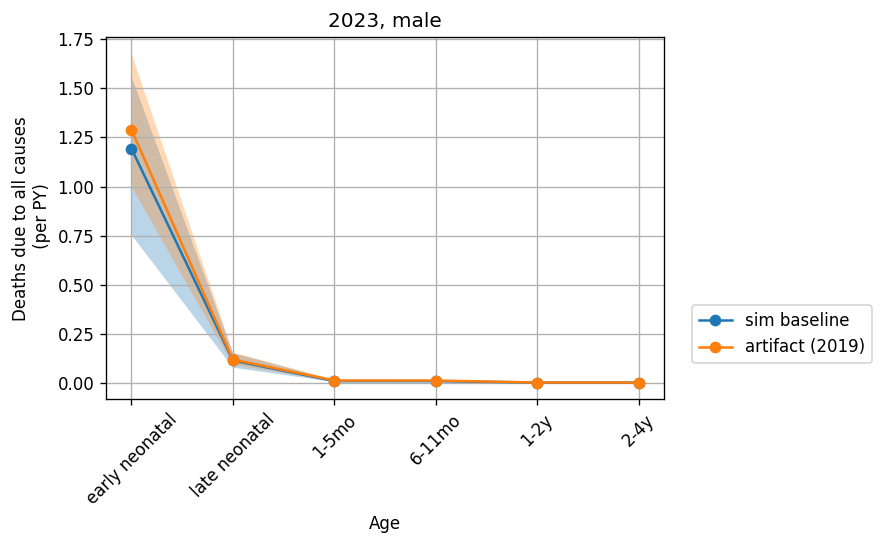

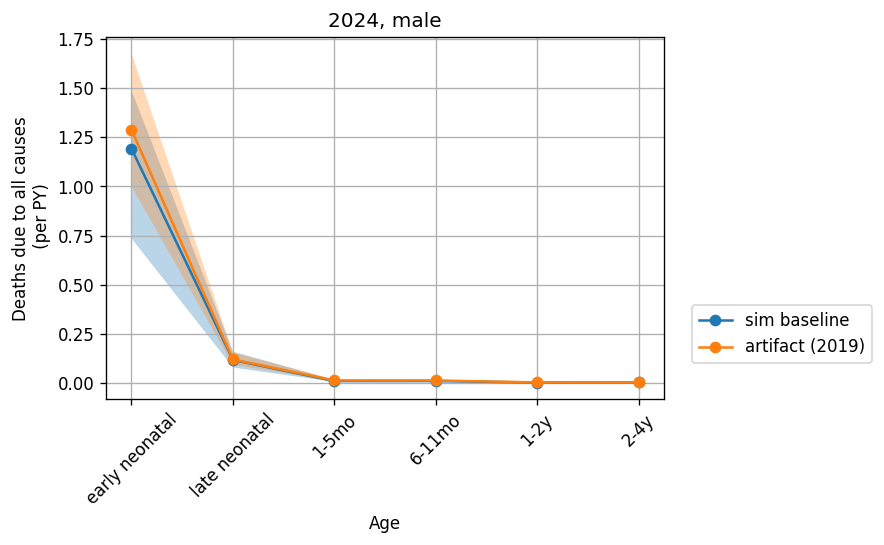

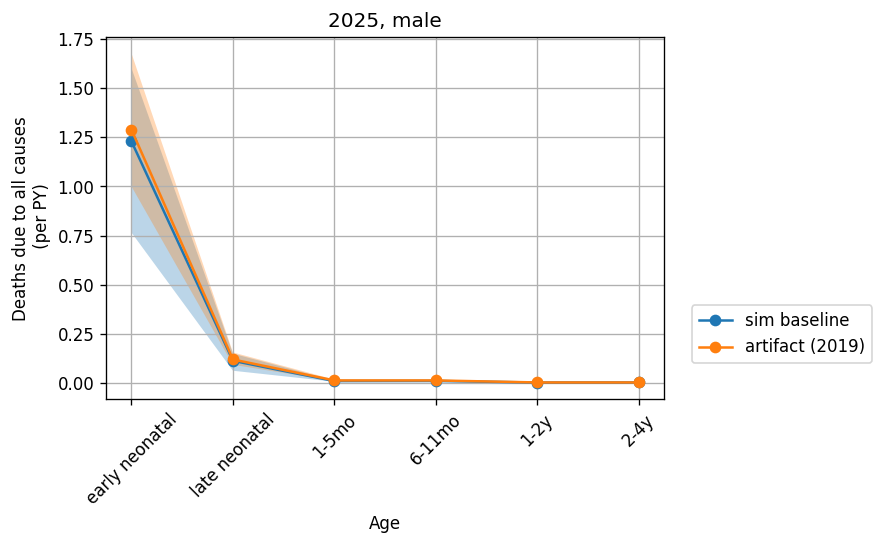

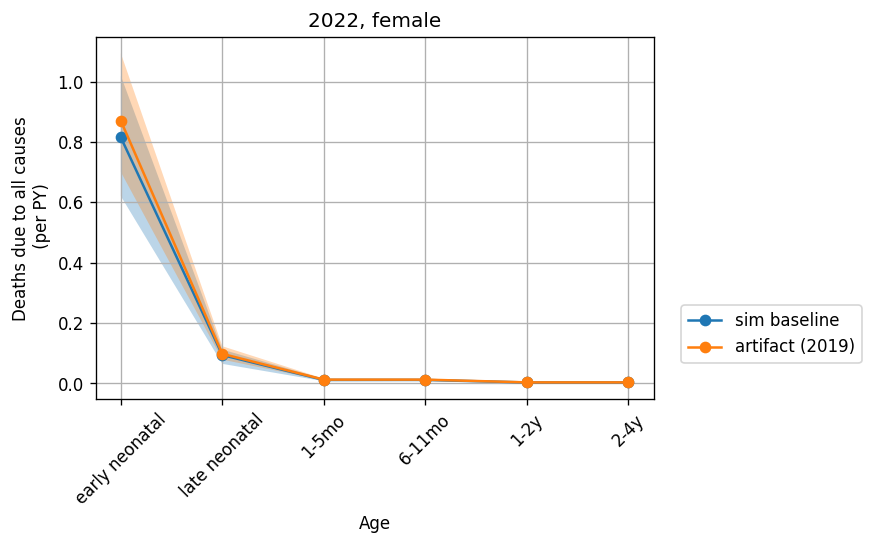

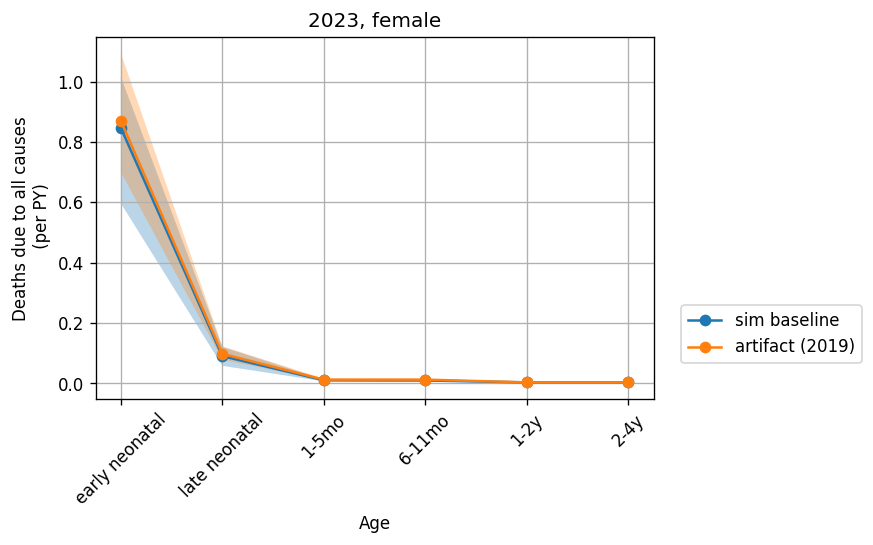

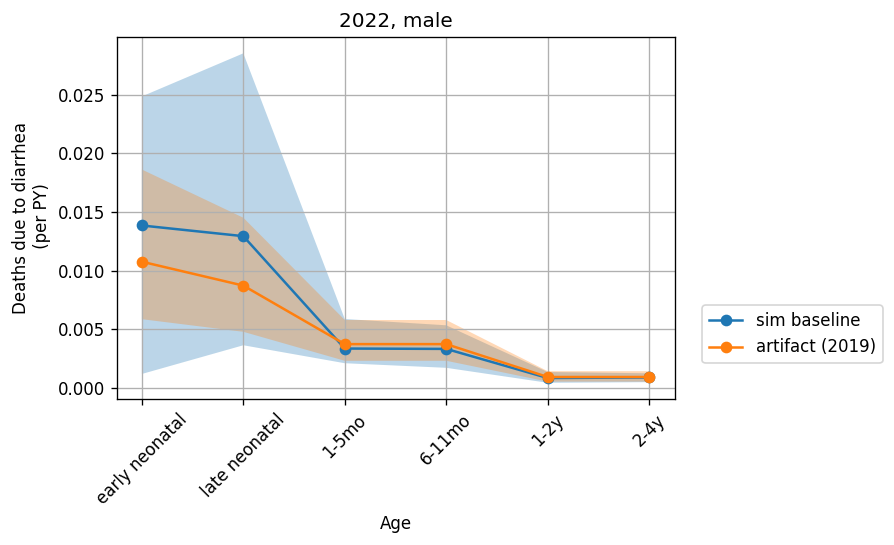

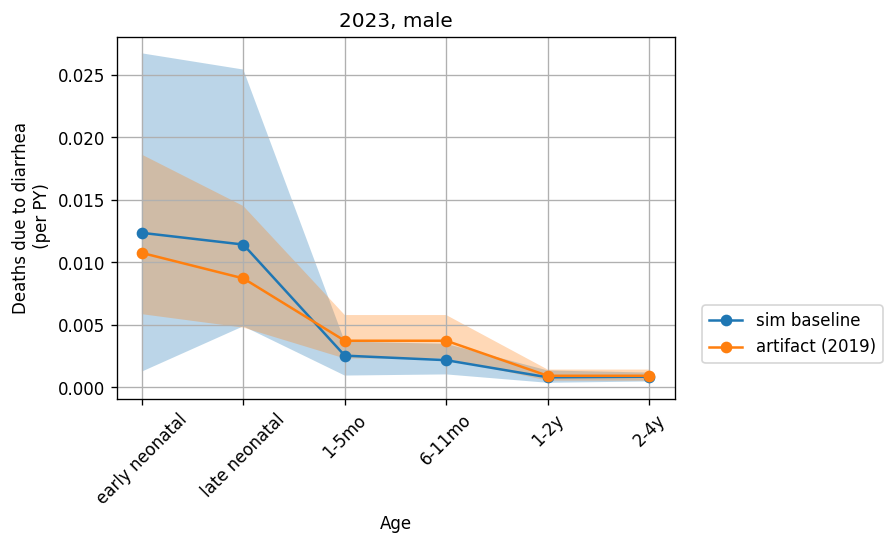

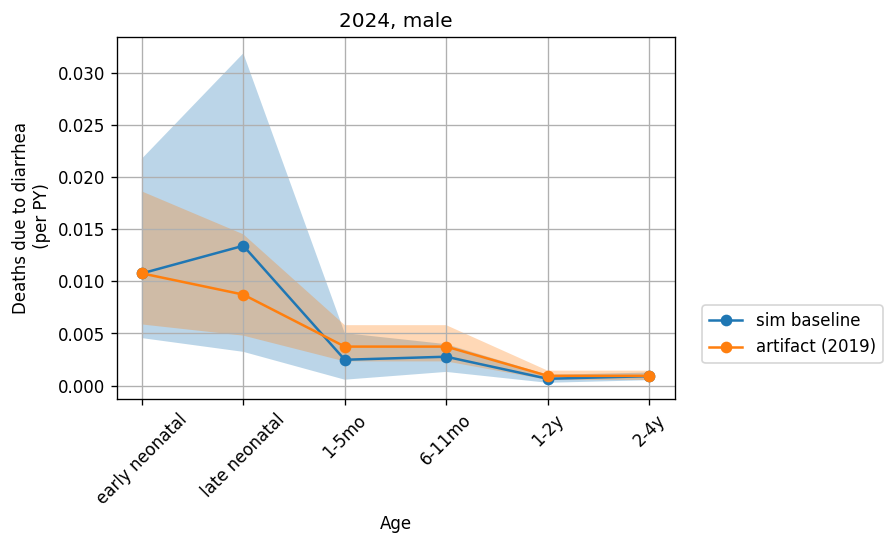

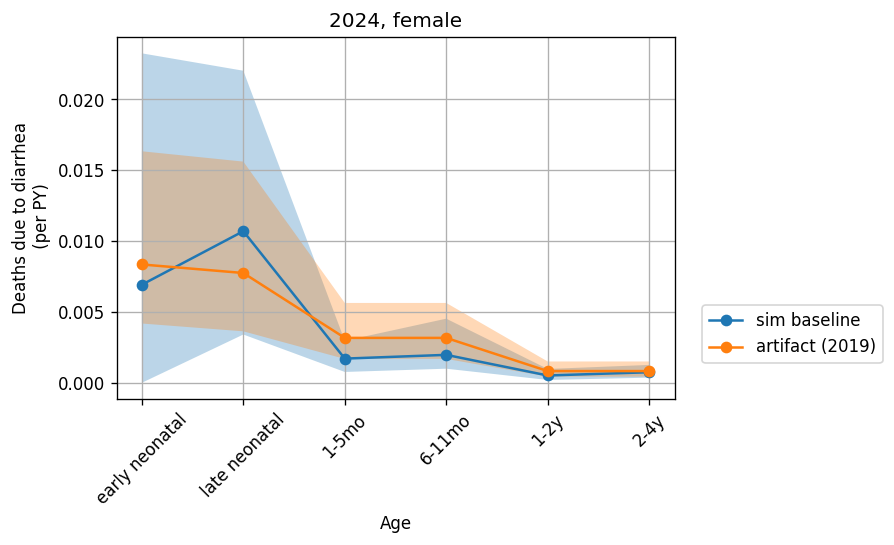

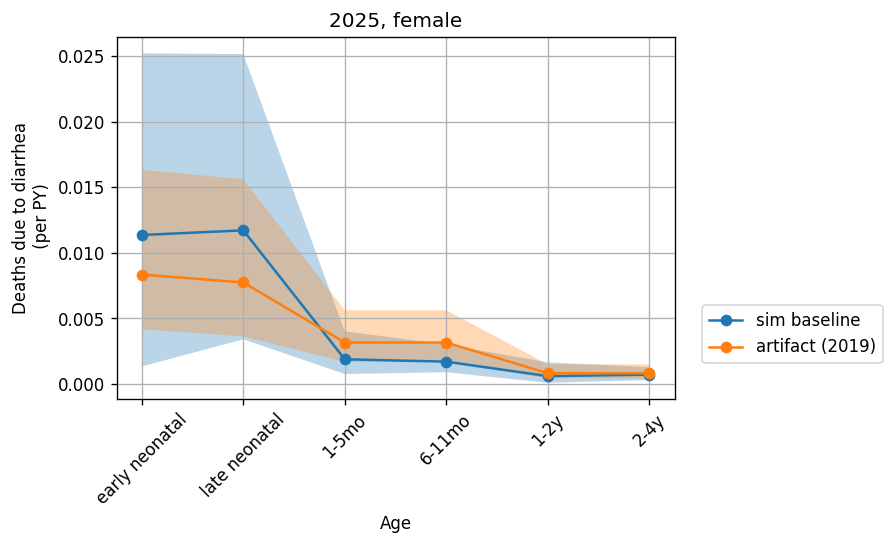

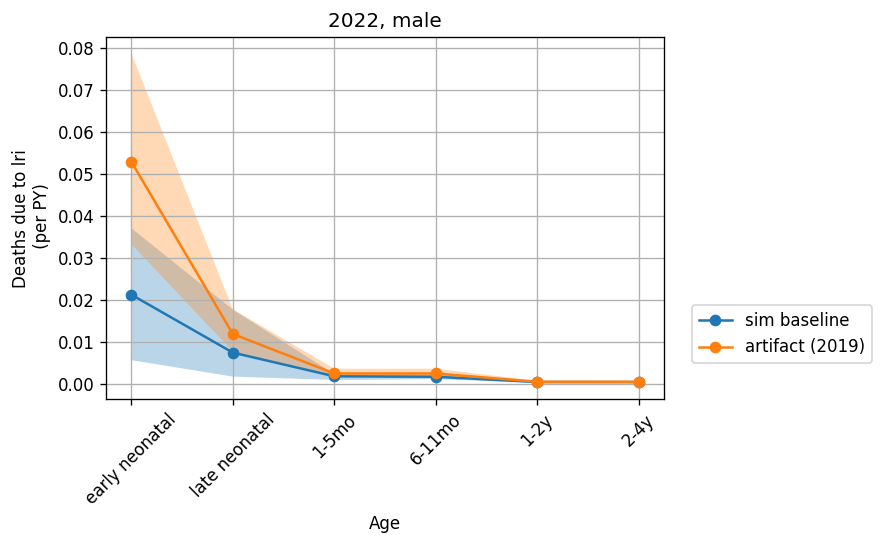

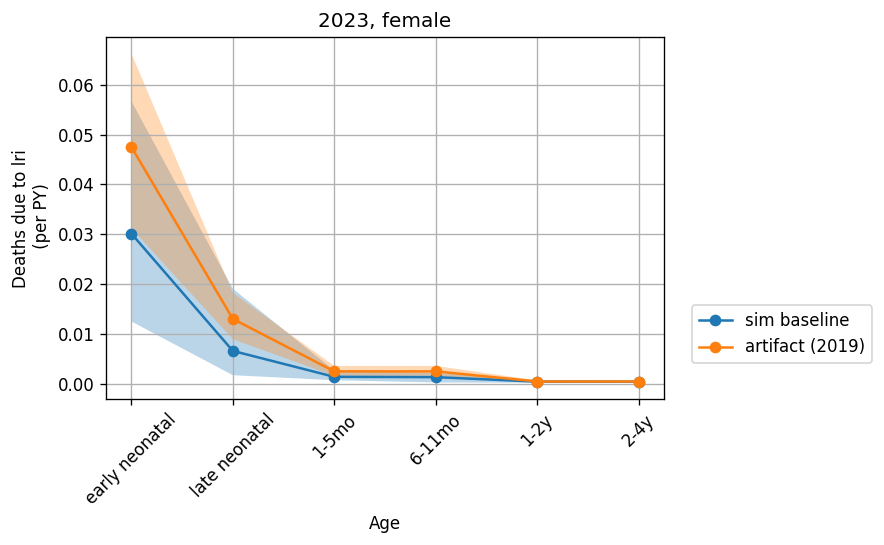

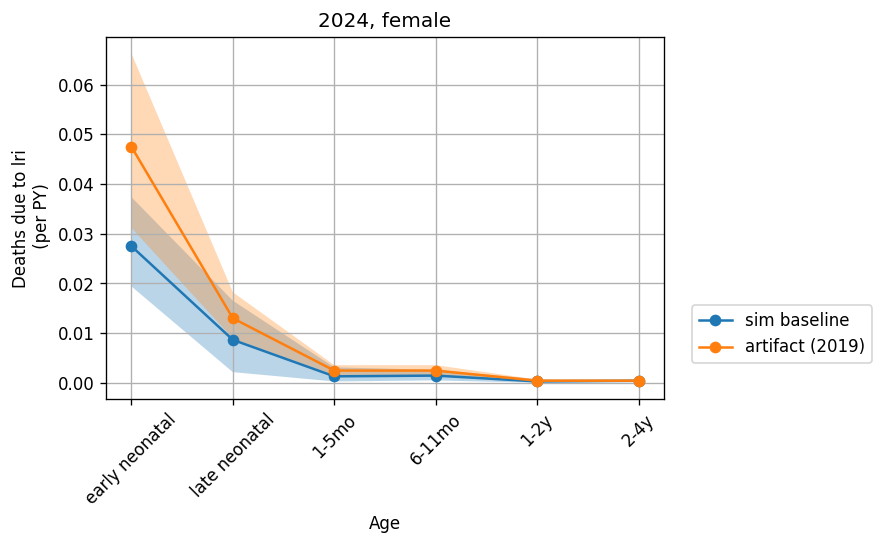

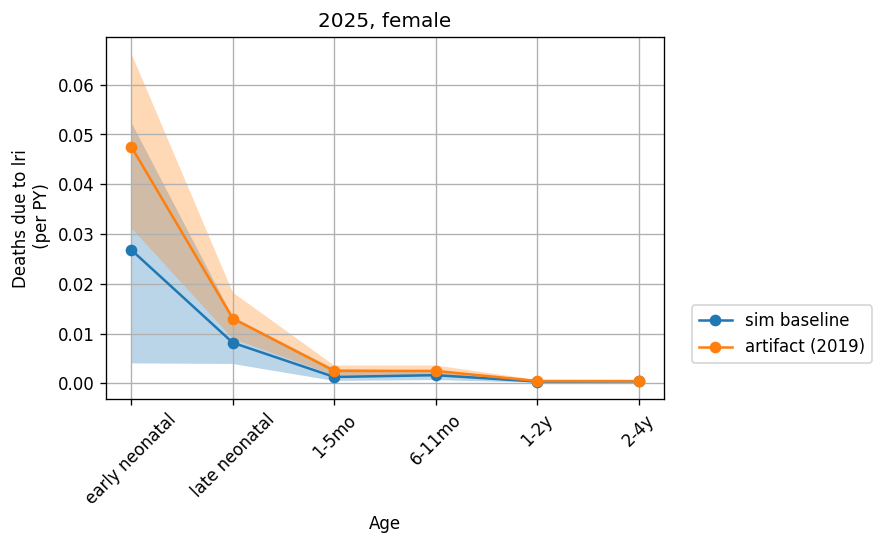

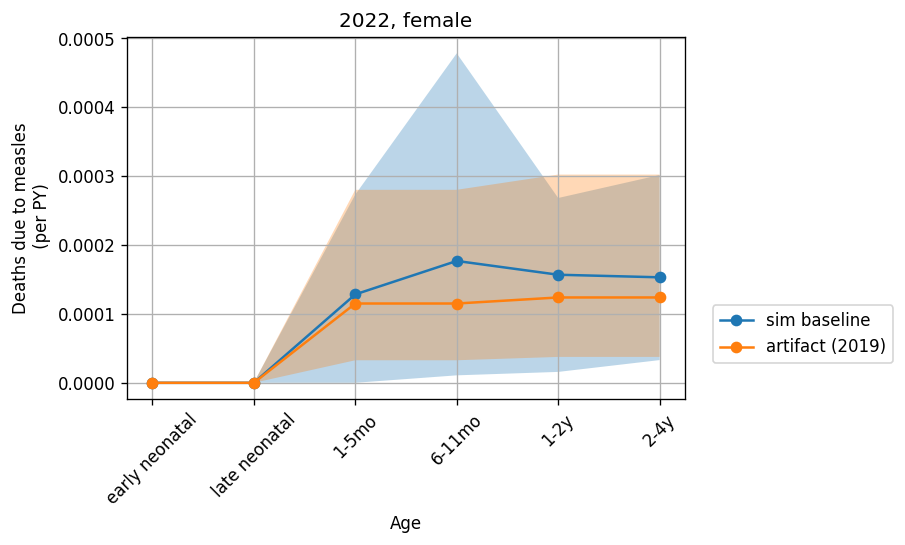

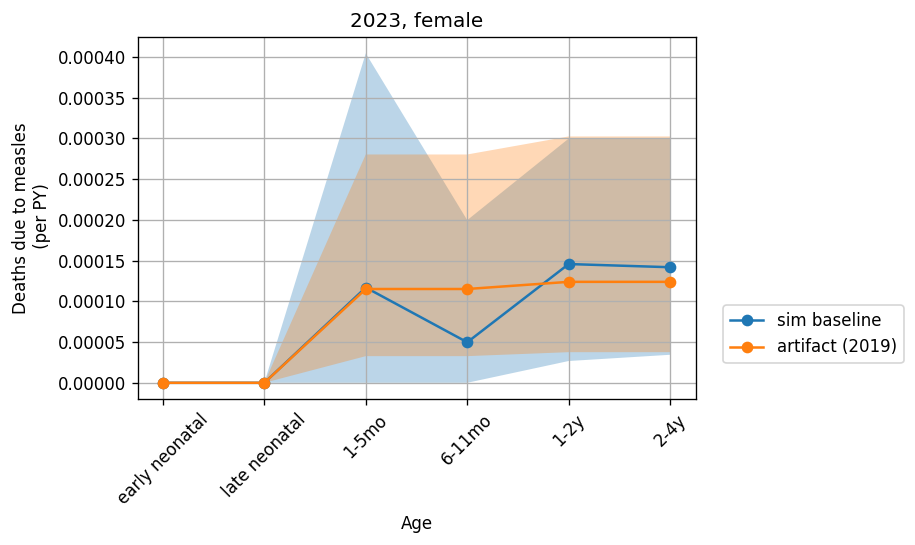

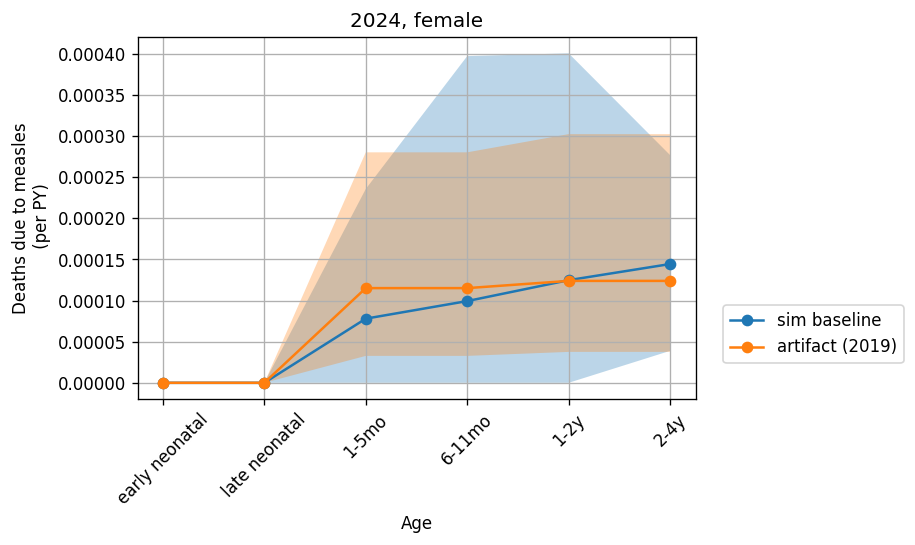

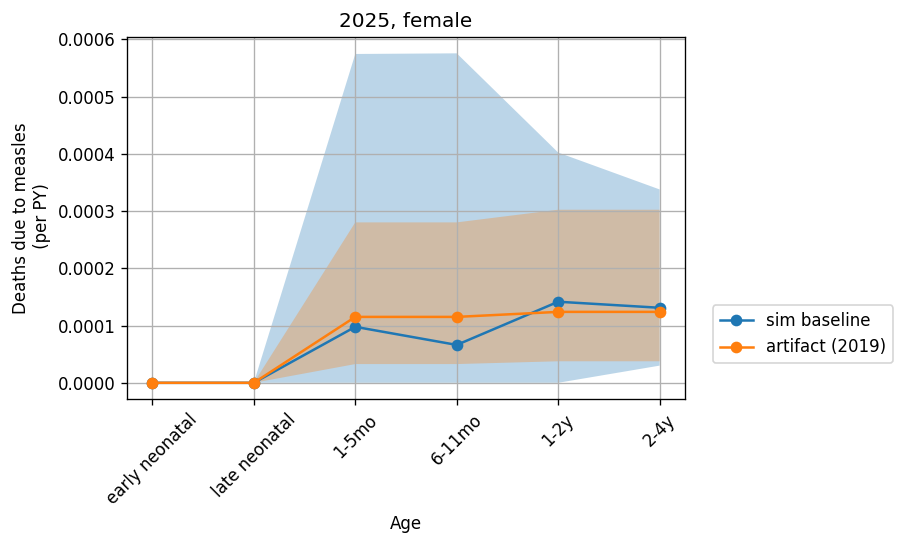

In [90]:
with PdfPages(output_dir + 'all_cause_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(acmr, art_acmr, sim_year, 2019, sex, 'acmr')
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'diarrhea_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_dd, art_csmr_dd, sim_year, 2019, sex, 'csmr_dd')      
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'lri_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_lri, art_csmr_lri, sim_year, 2019, sex, 'csmr_lri') 
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'measles_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_msls, art_csmr_msls, sim_year, 2019, sex, 'csmr_msls') 
            pdf.savefig(bbox_inches='tight')

In [91]:
ls /share/scratch/users/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting/

all_cause_mortality.pdf  lri_mortality.pdf
diarrhea_mortality.pdf   measles_mortality.pdf


# PREVALENCE

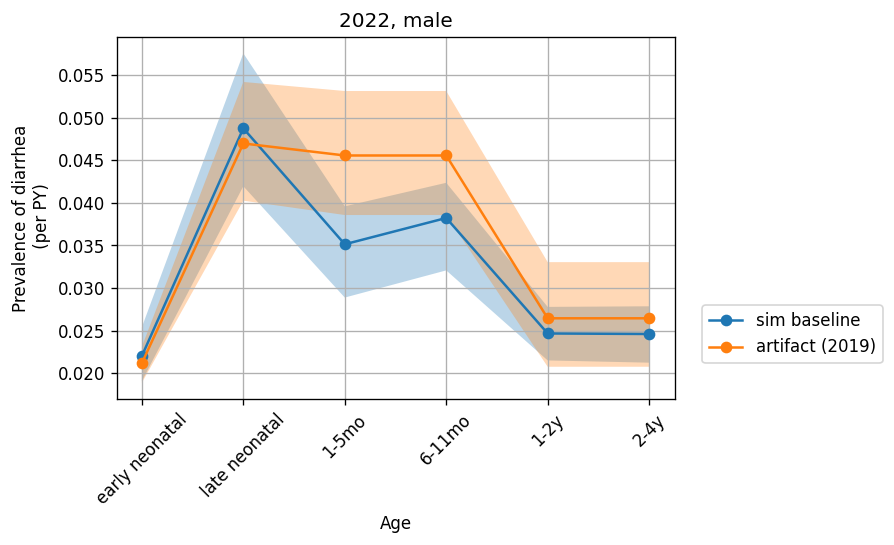

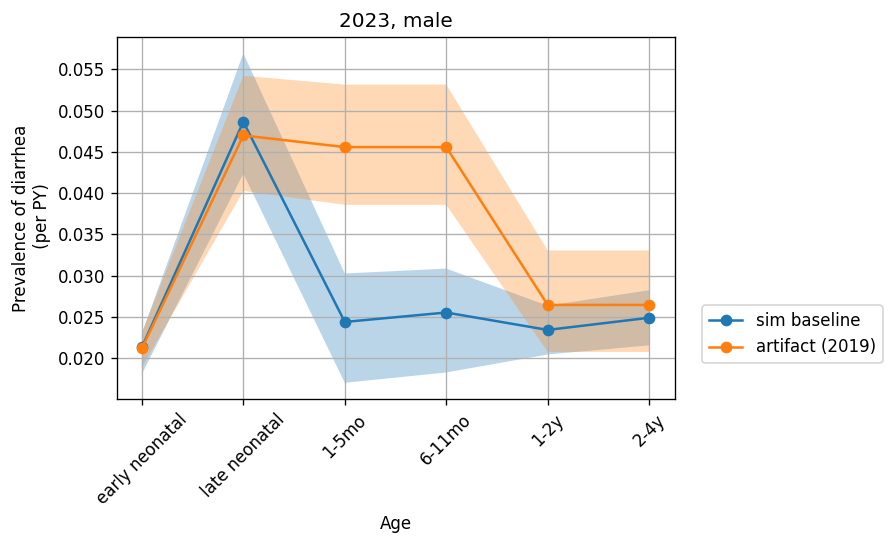

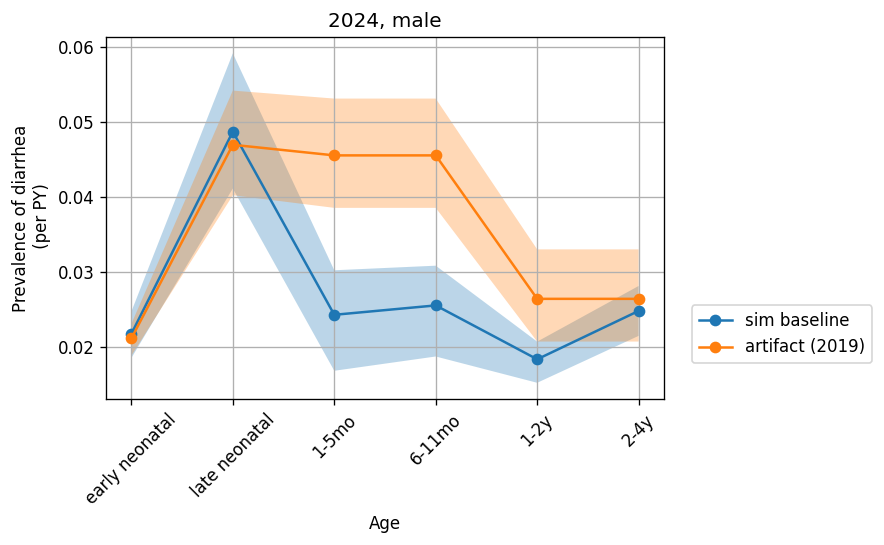

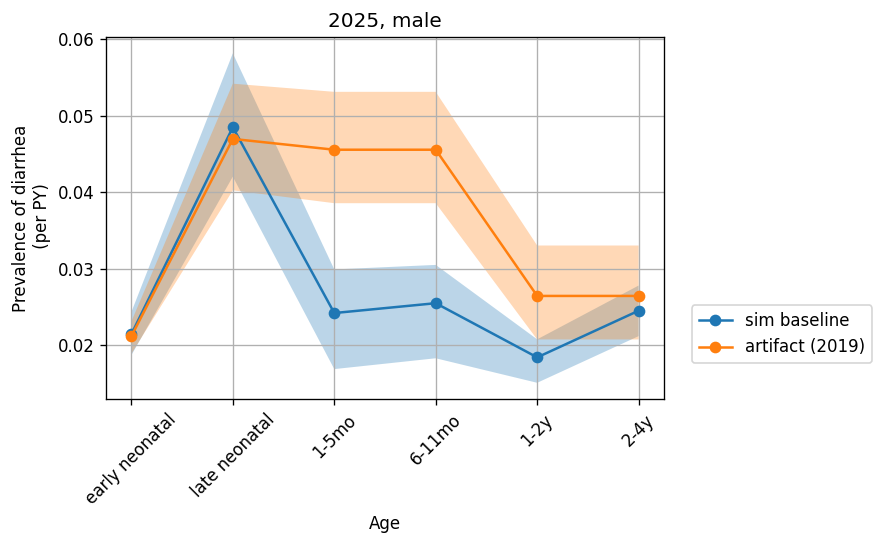

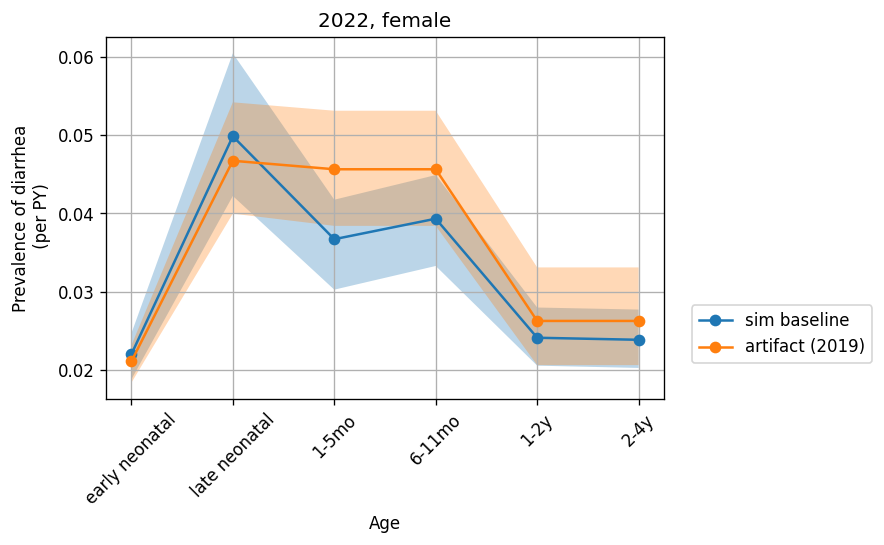

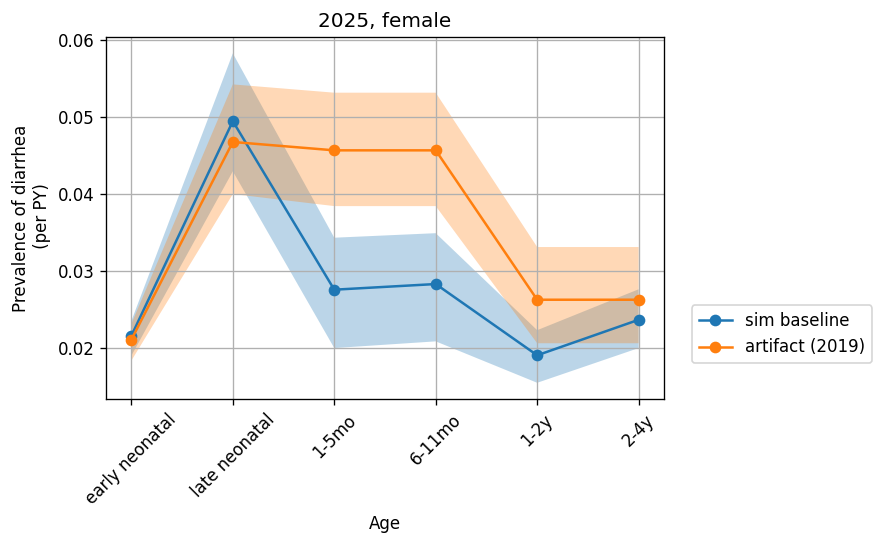

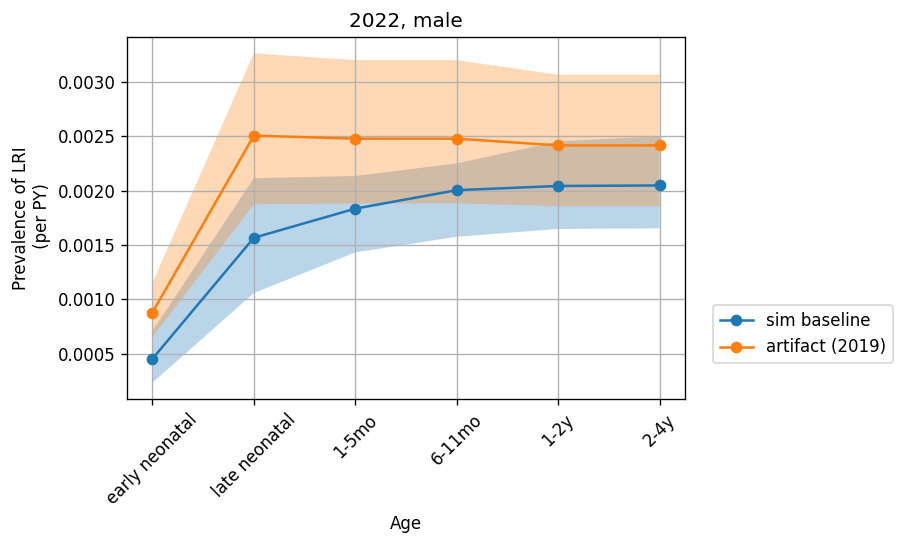

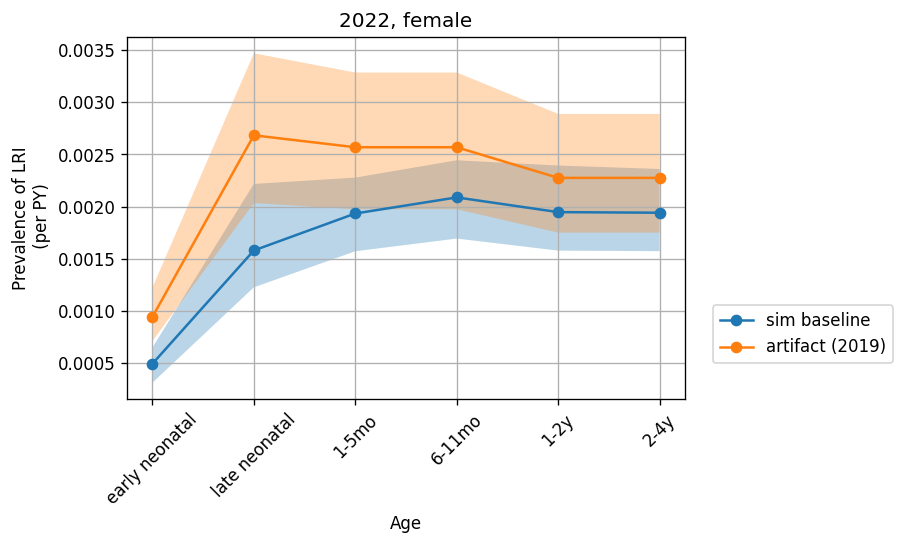

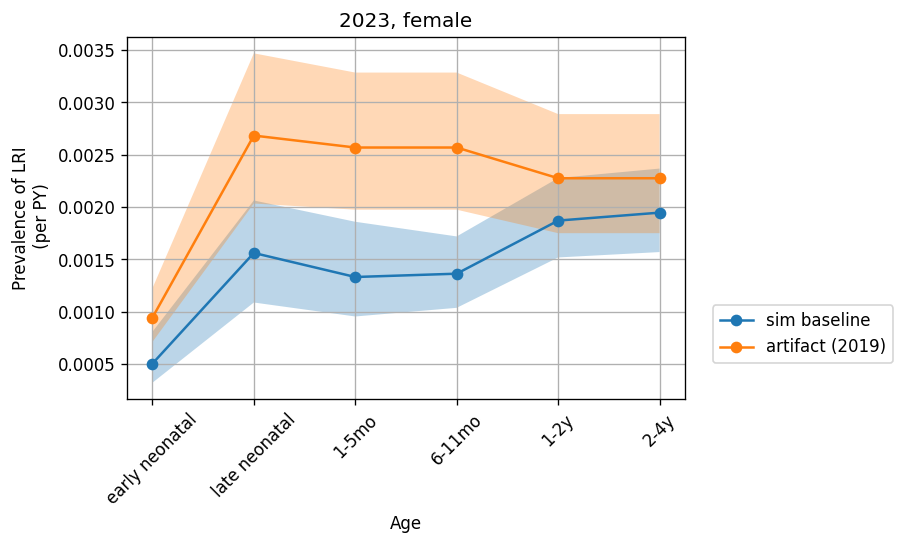

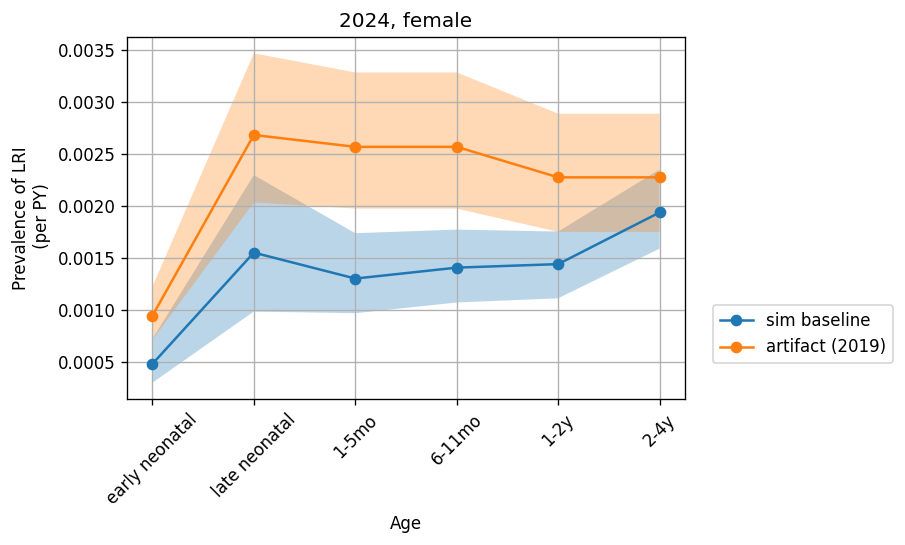

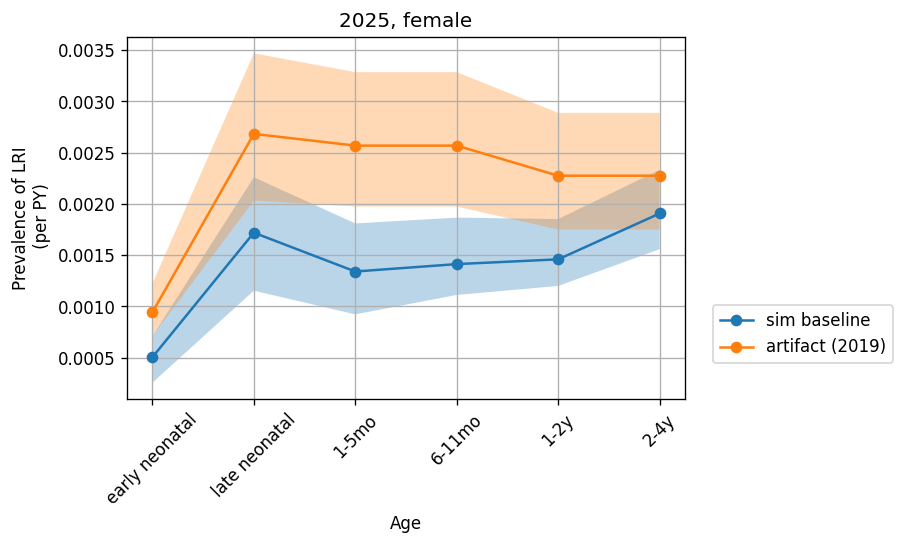

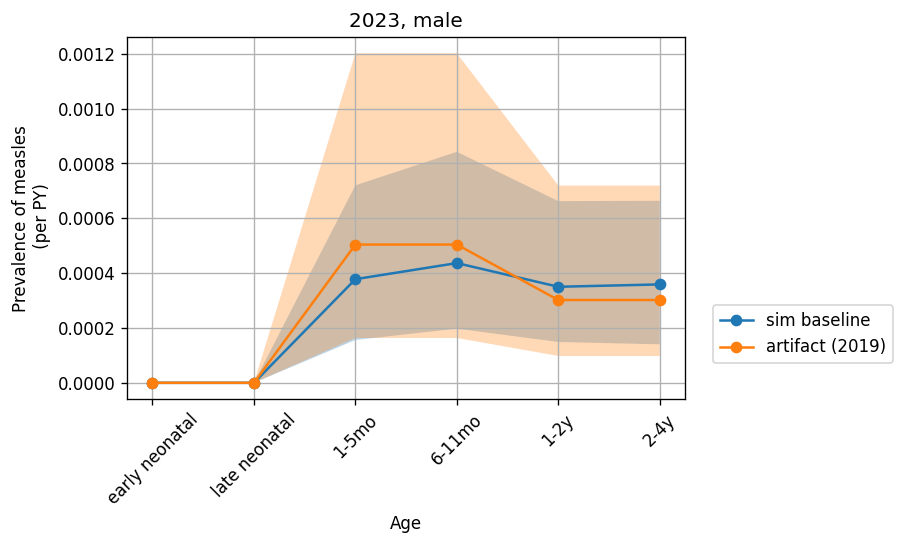

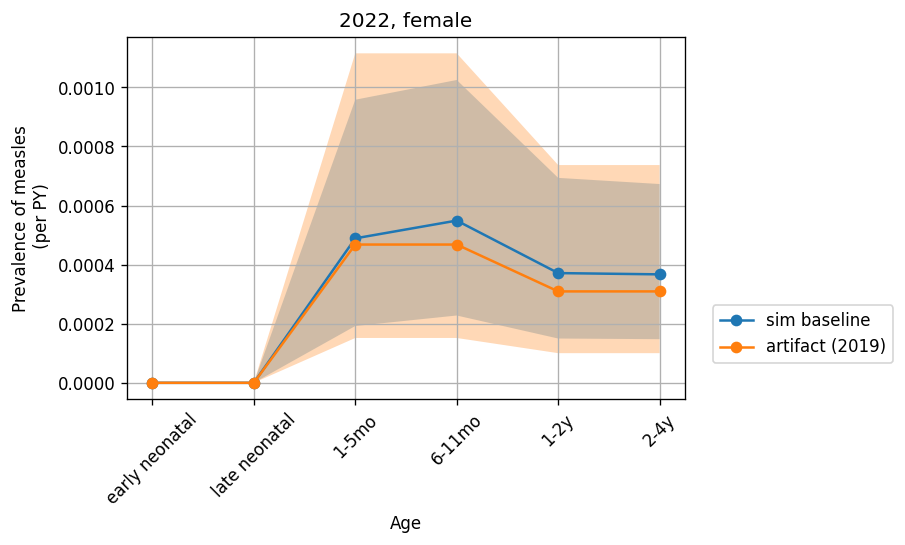

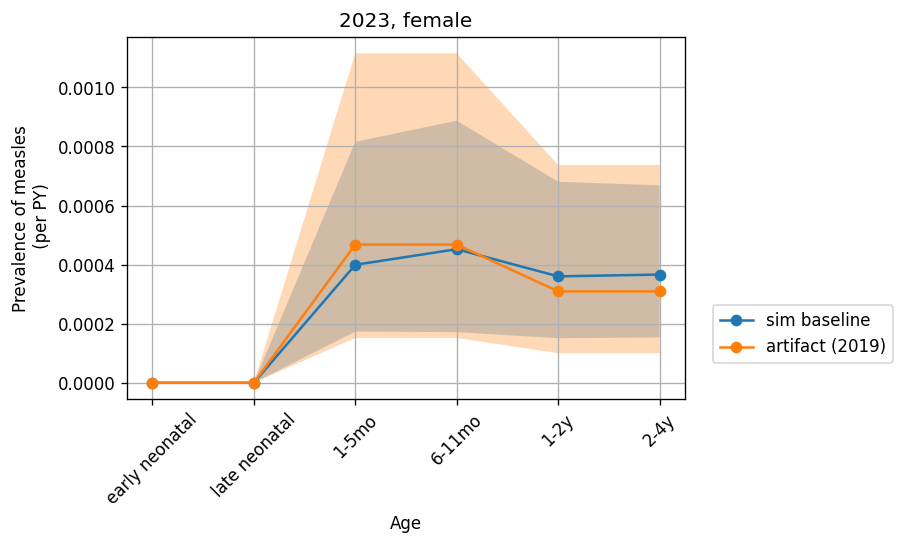

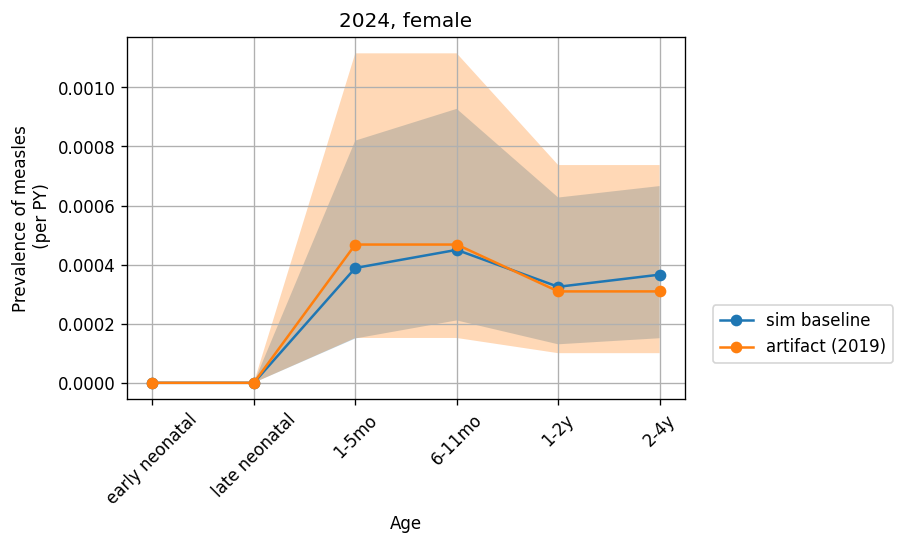

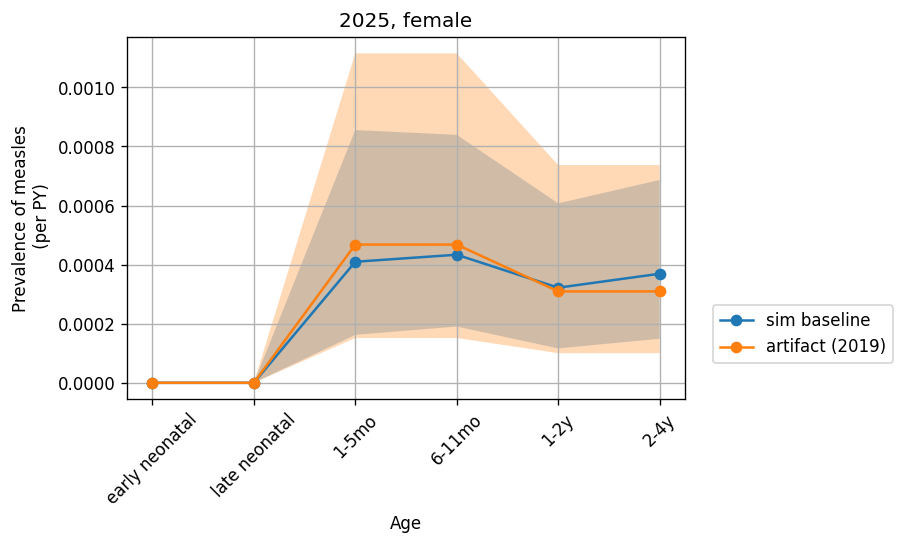

In [92]:
with PdfPages(output_dir + 'diarrhea_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_dd, art_prevalence_dd, sim_year, 2019, sex, 'prevalence_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_lri, art_prevalence_lri, sim_year, 2019, sex, 'prevalence_lri')                
            pdf.savefig(bbox_inches='tight')

with PdfPages(output_dir + 'measles_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_msls, art_prevalence_msls, sim_year, 2019, sex, 'prevalence_msls')
            pdf.savefig(bbox_inches='tight')


# INCIDENCE

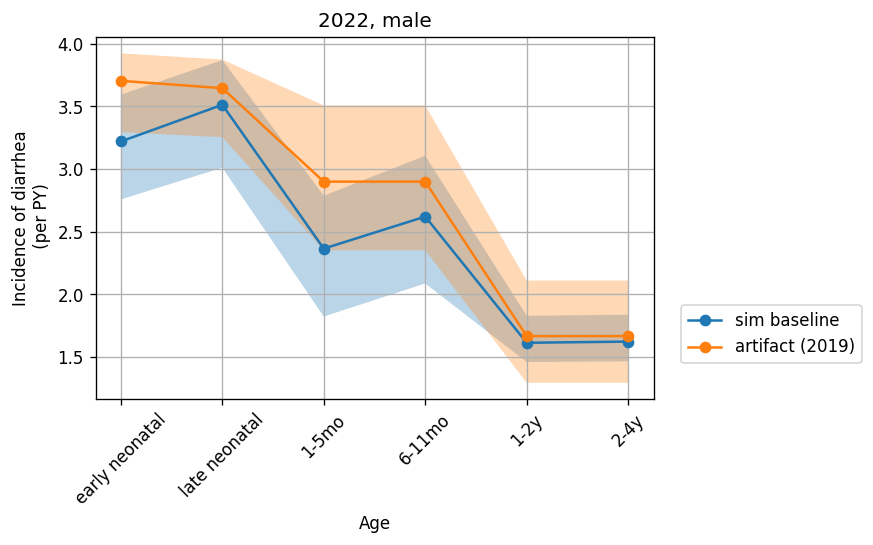

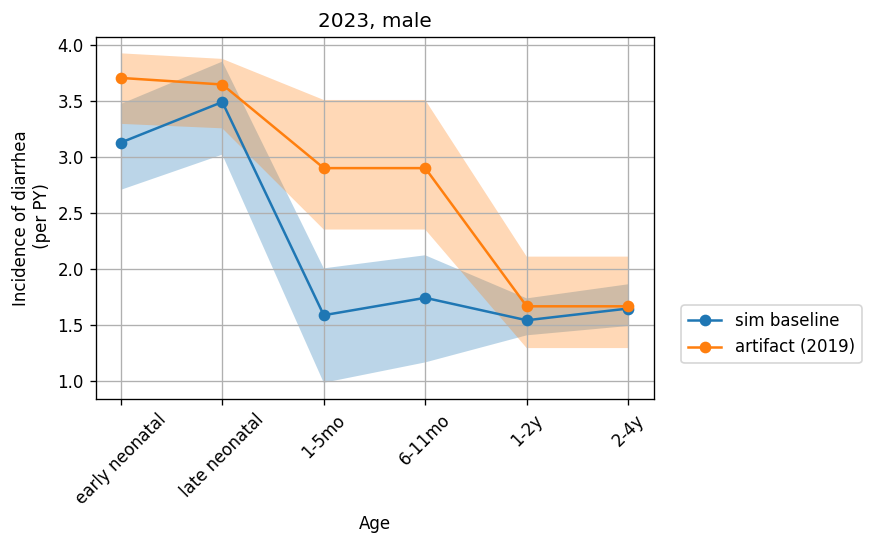

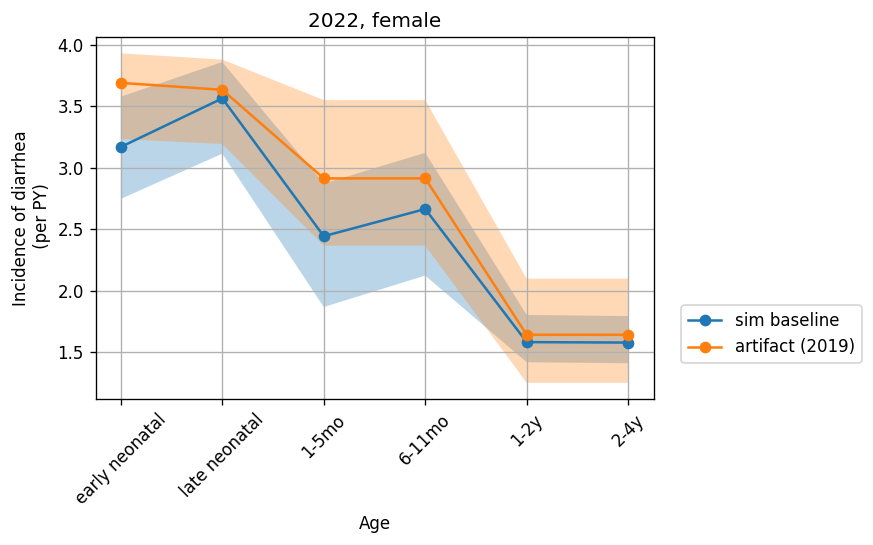

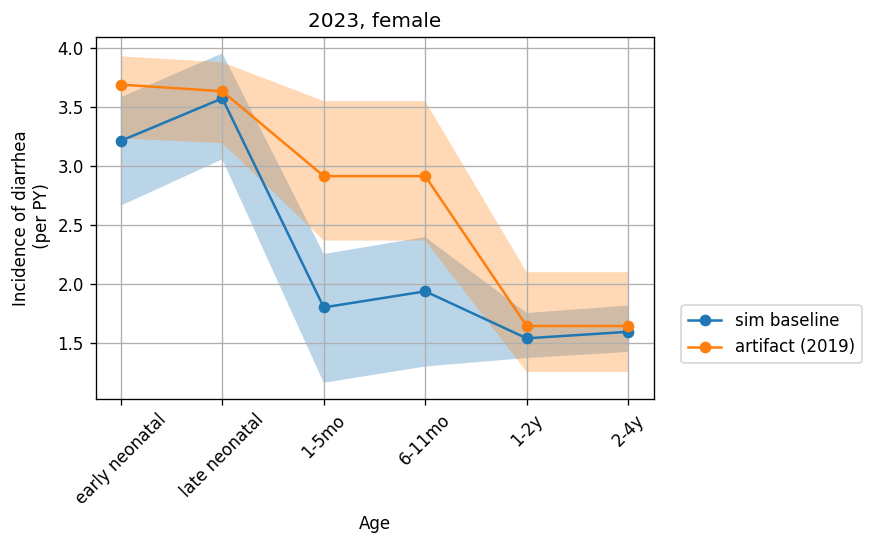

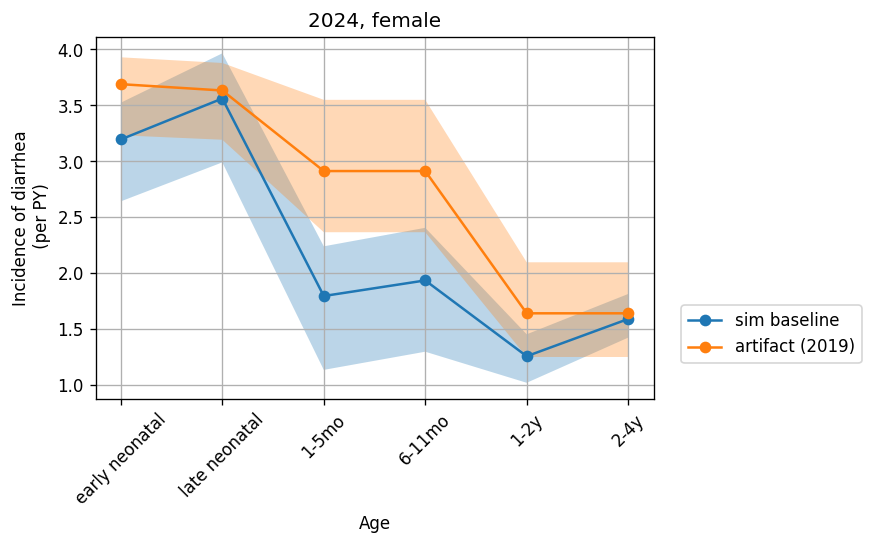

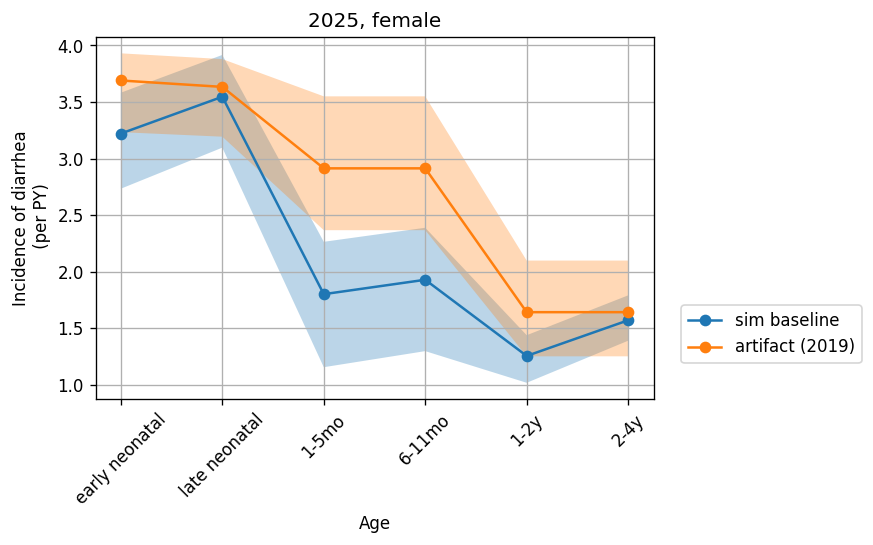

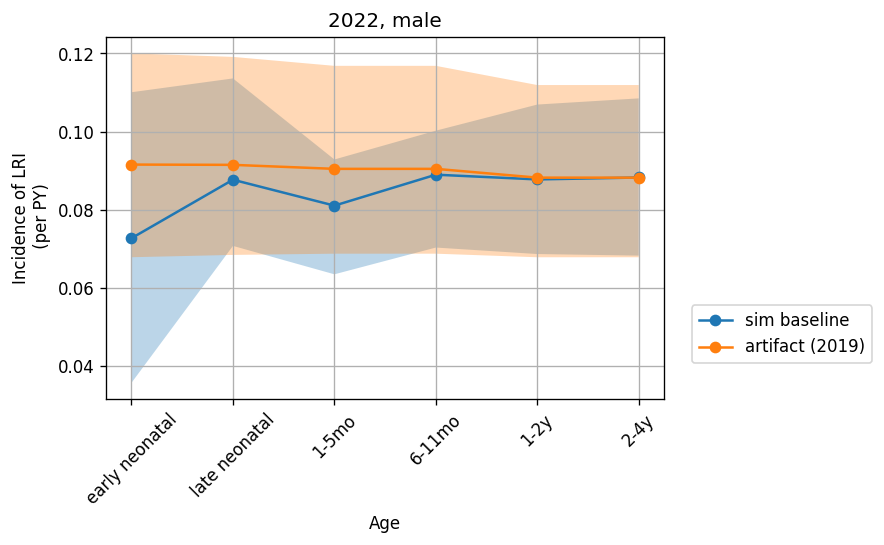

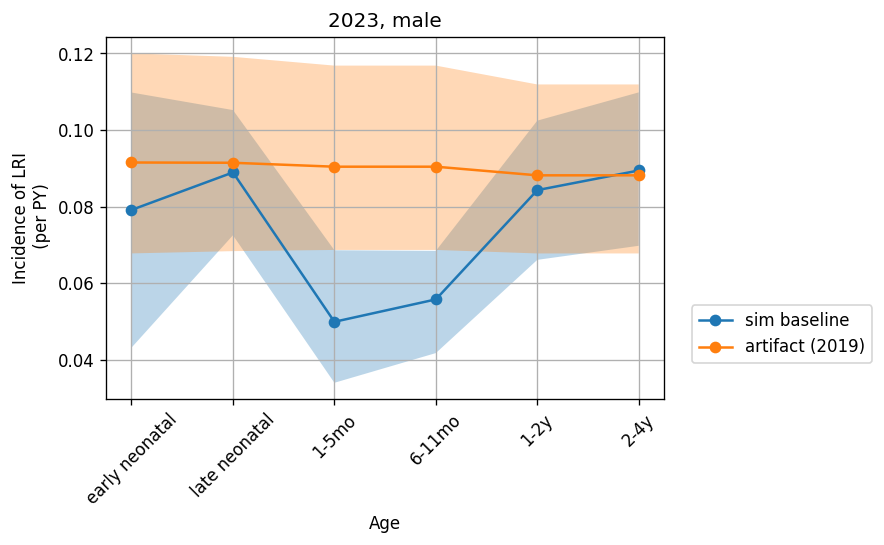

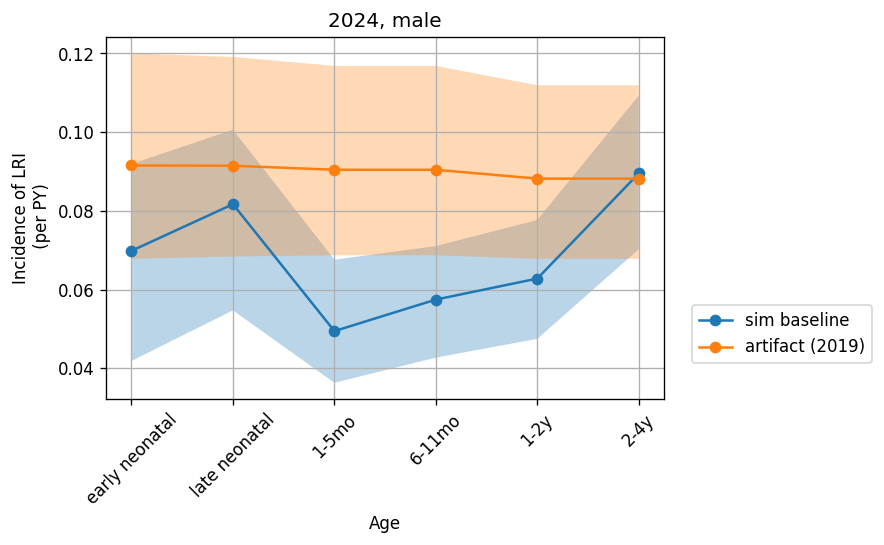

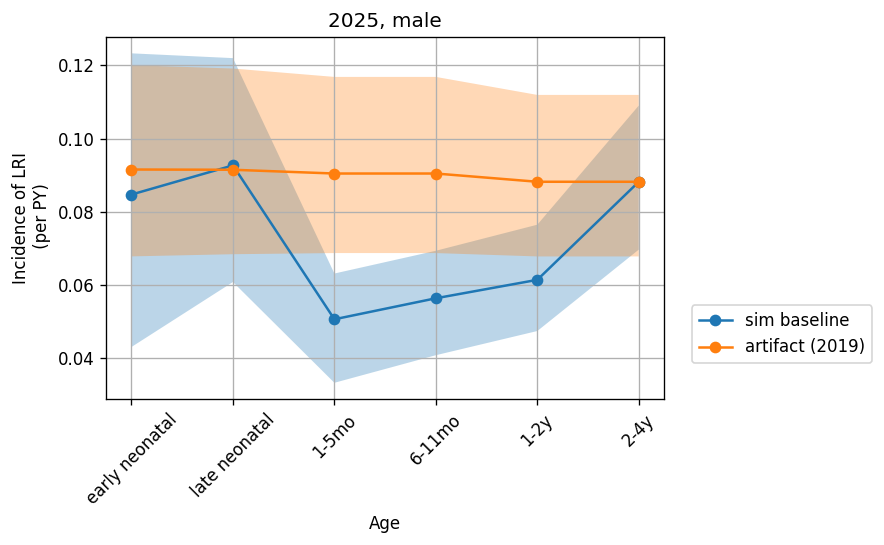

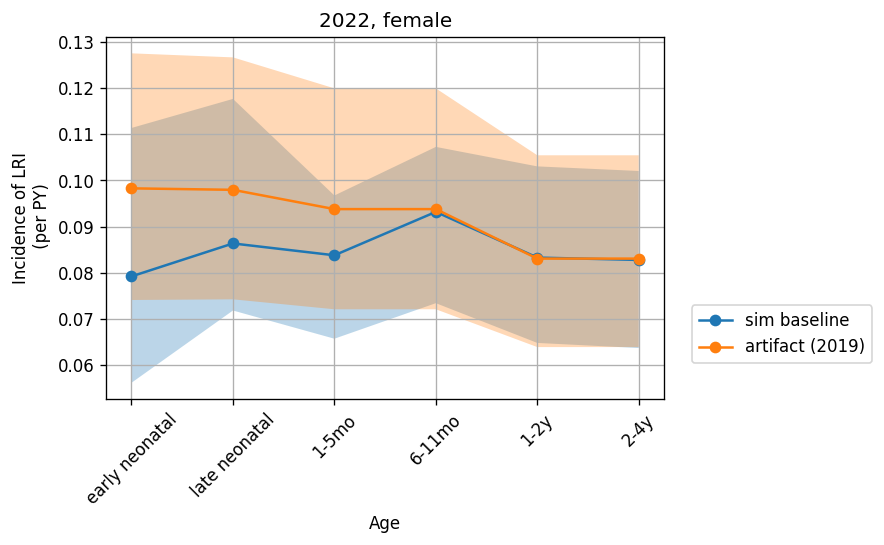

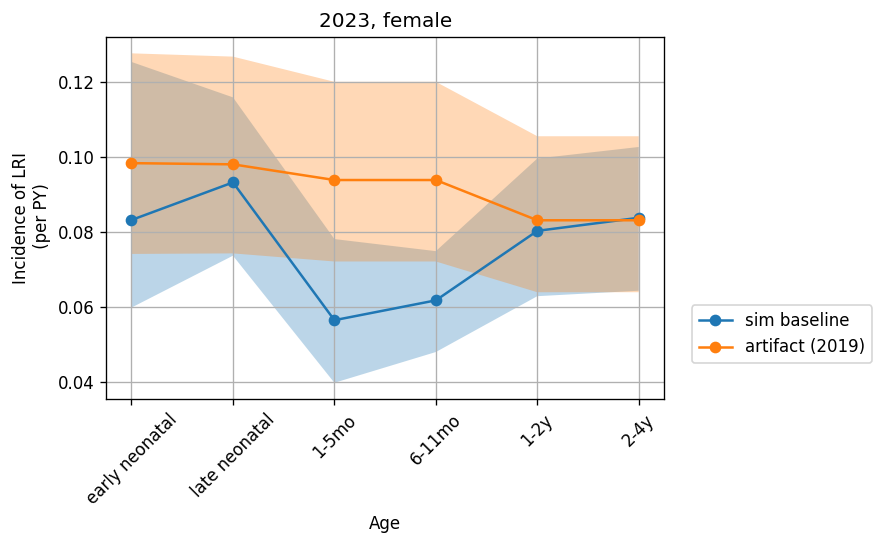

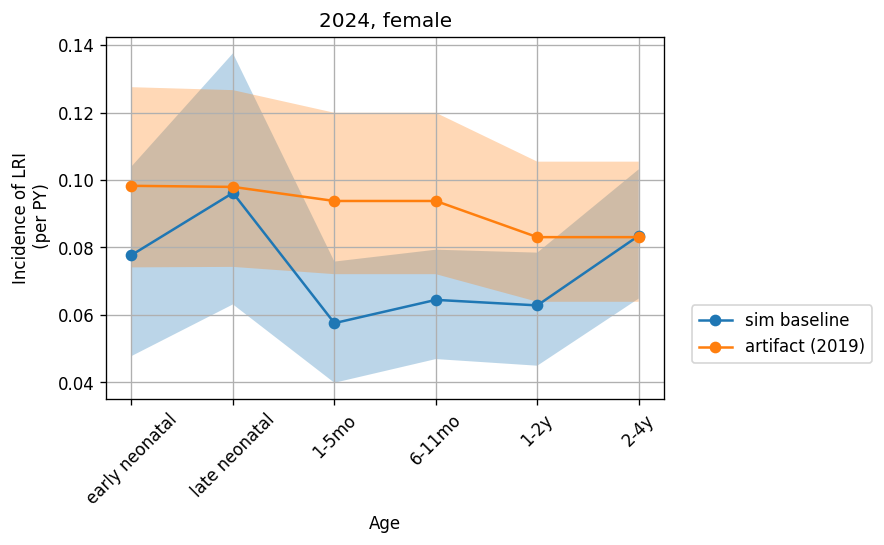

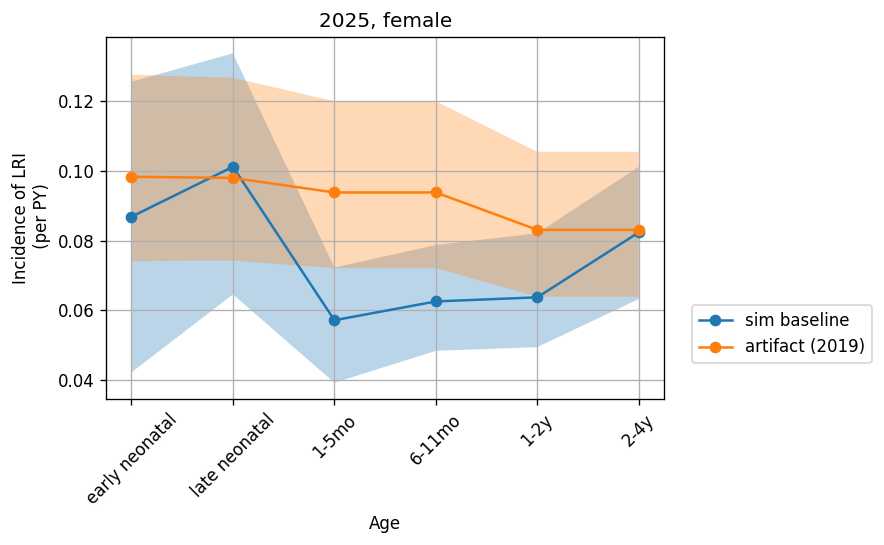

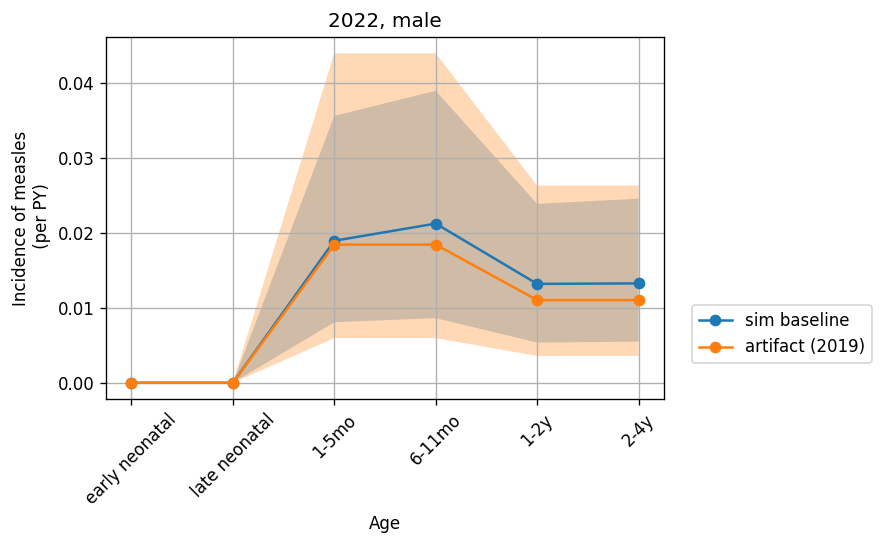

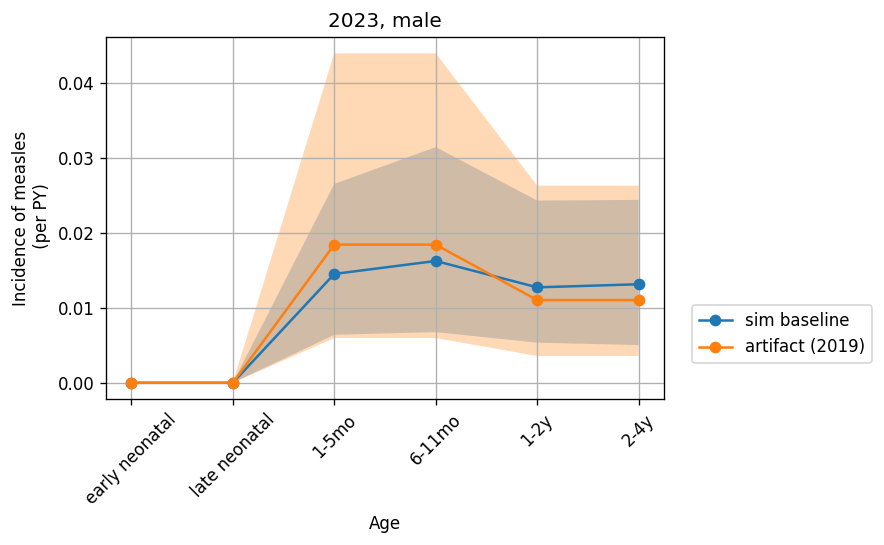

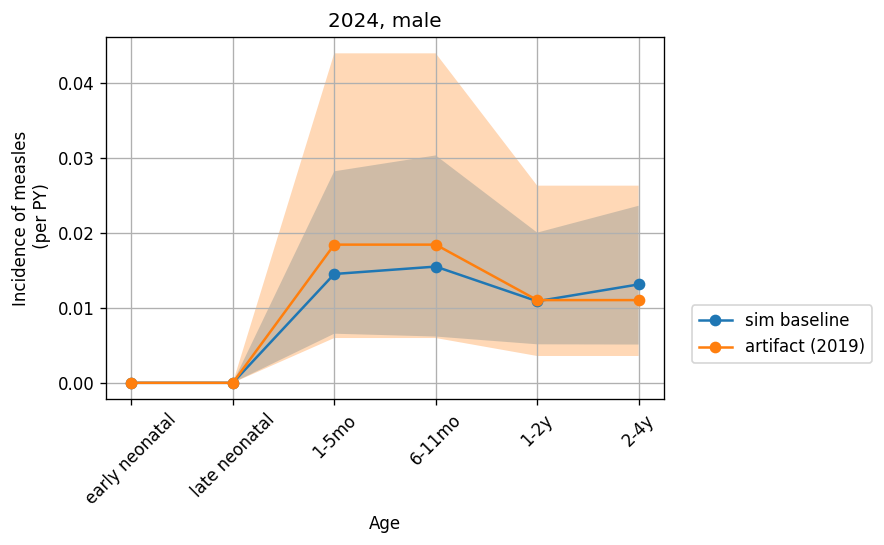

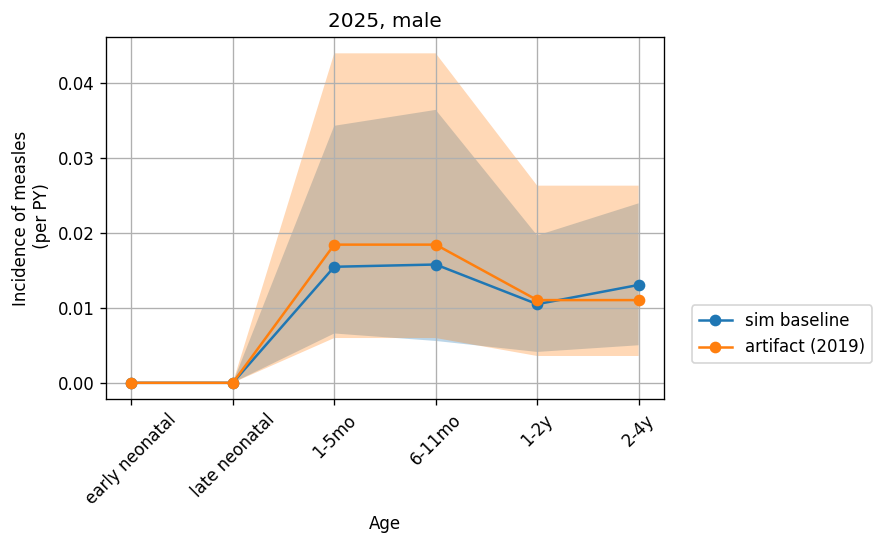

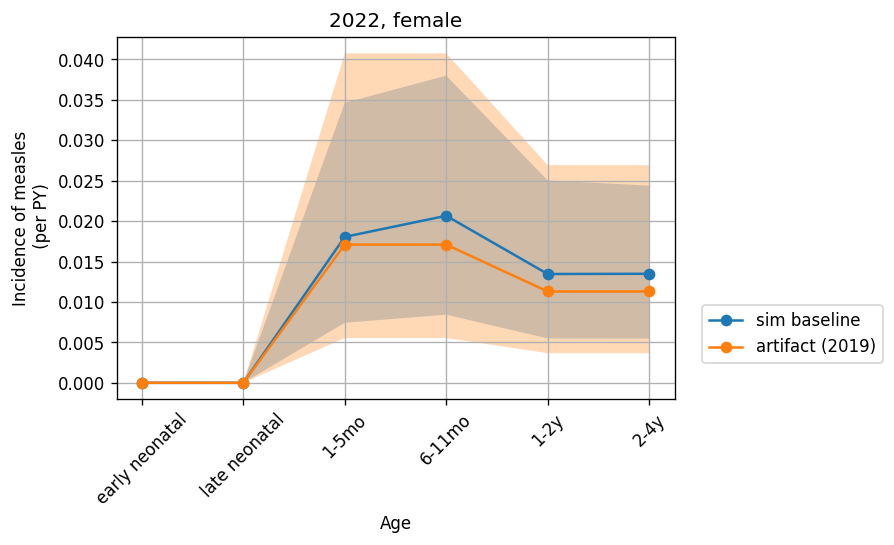

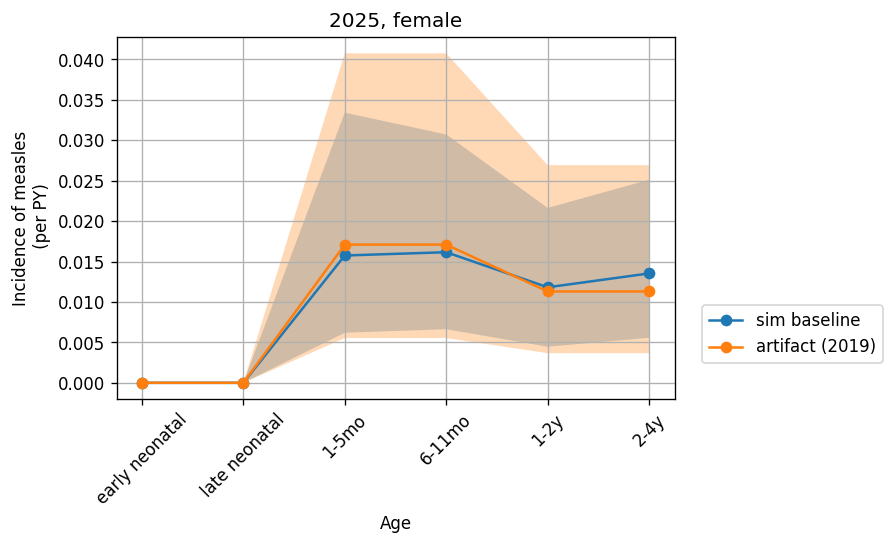

In [93]:
with PdfPages(output_dir + 'diarrhea_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_dd, art_incidence_dd, sim_year, 2019, sex, 'incidence_dd')           
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_lri, art_incidence_lri, sim_year, 2019, sex, 'incidence_lri')
            pdf.savefig(bbox_inches='tight')
            
            
with PdfPages(output_dir + 'measles_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_msls, art_incidence_msls, sim_year, 2019, sex, 'incidence_msls')
            pdf.savefig(bbox_inches='tight')

# REMISSION

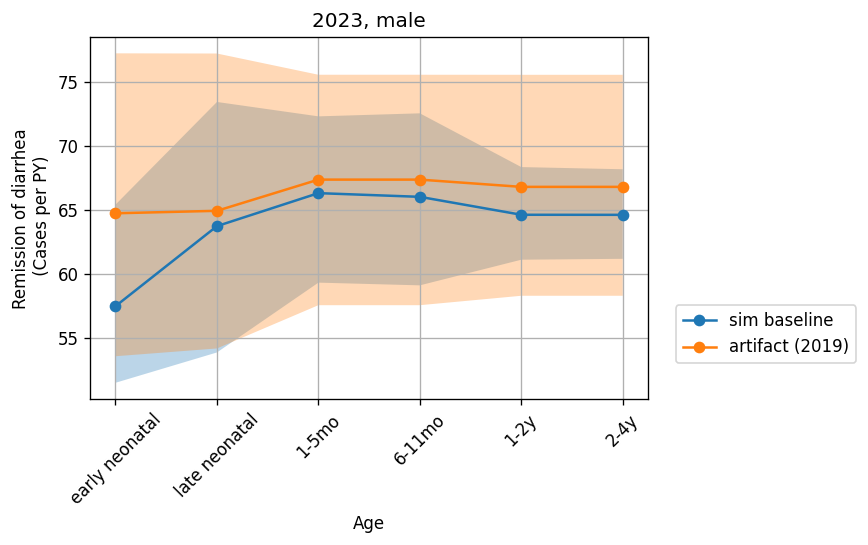

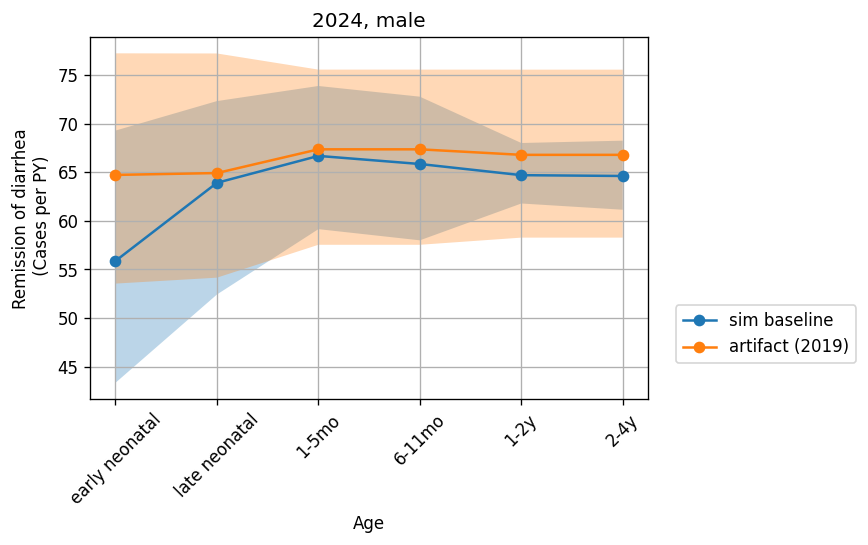

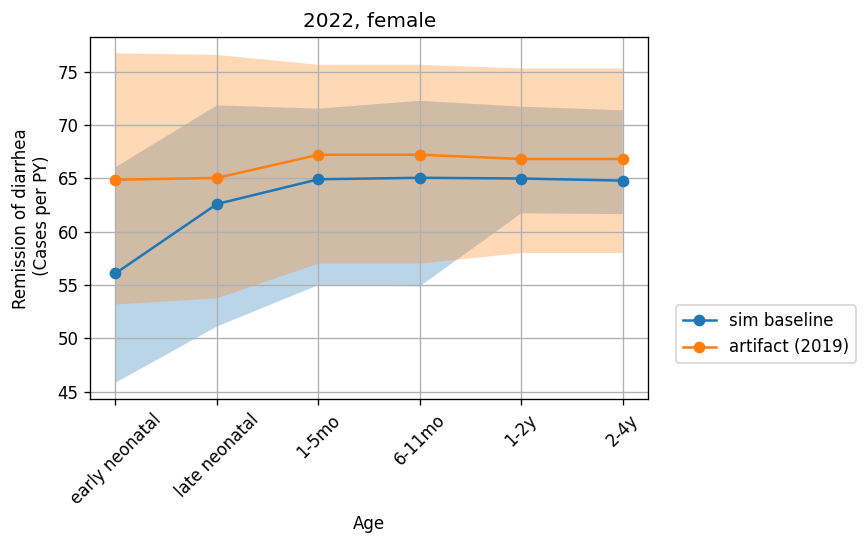

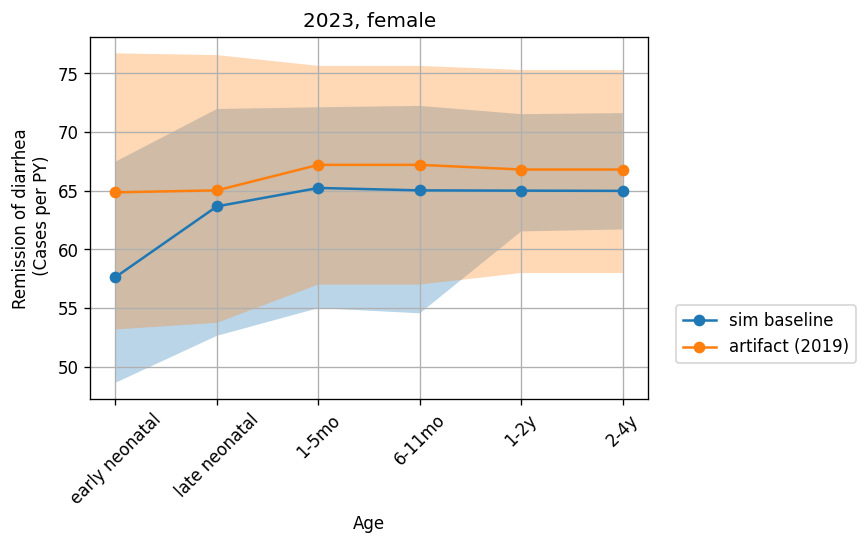

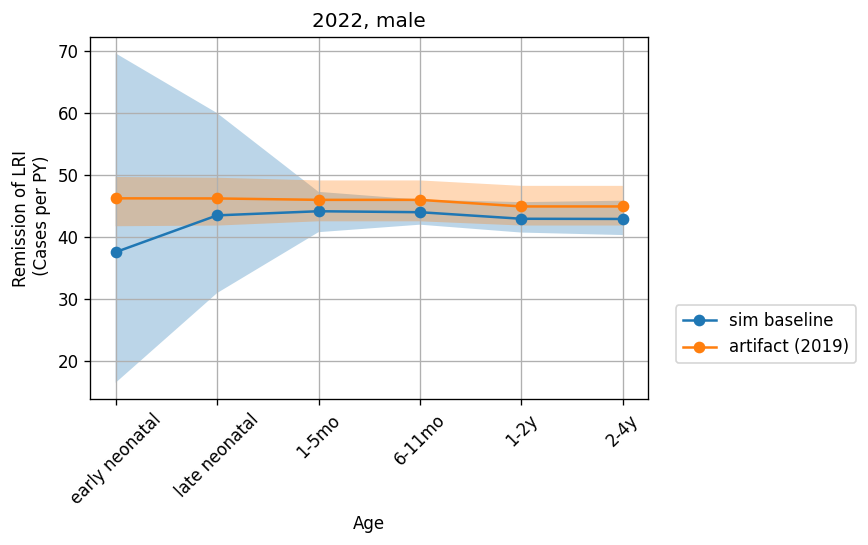

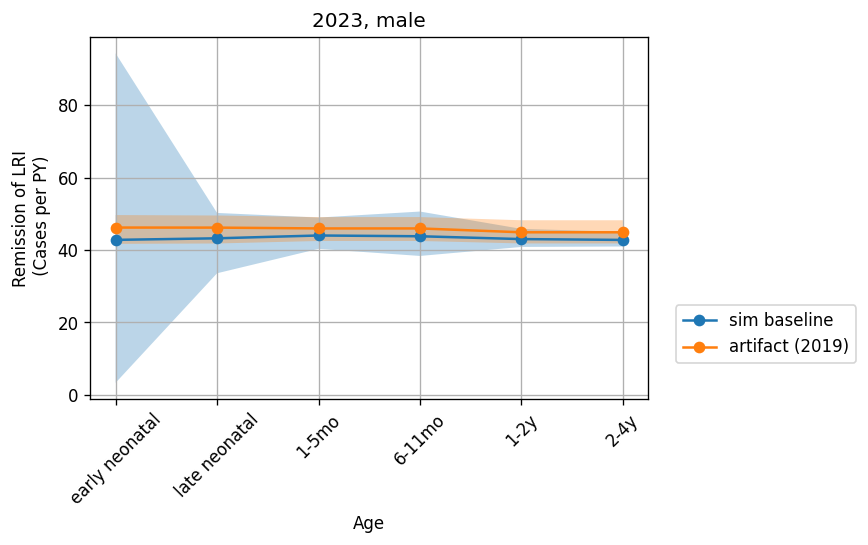

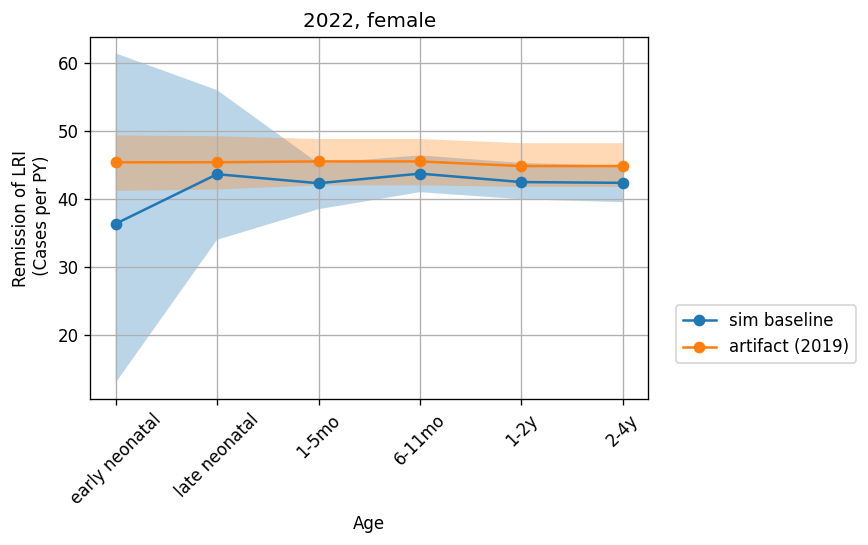

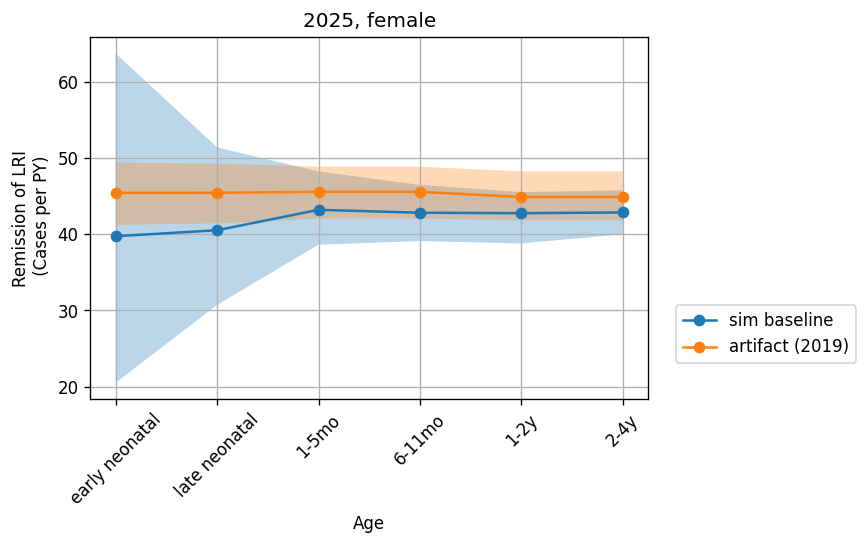

In [94]:
with PdfPages(output_dir + 'diarrhea_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_dd, art_remission_dd, sim_year, 2019, sex, 'remission_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_lri, art_remission_lri, sim_year, 2019, sex, 'remission_lri')            
            pdf.savefig(bbox_inches='tight')
            
# with PdfPages(output_dir + 'measles_remission.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(remission_msls, art_remission_msls, sim_year, 2019, sex, 'remission_msls')
#             pdf.savefig(bbox_inches='tight')

# EXCESS MORTALITY

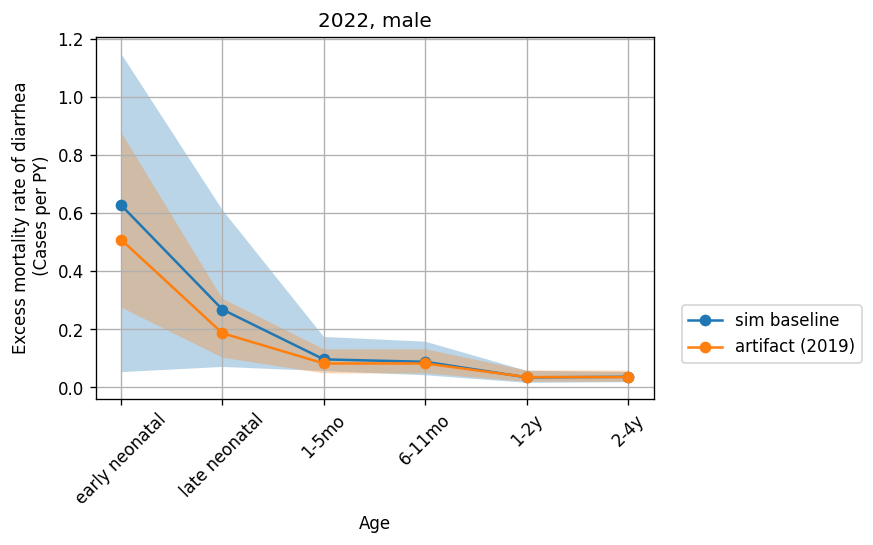

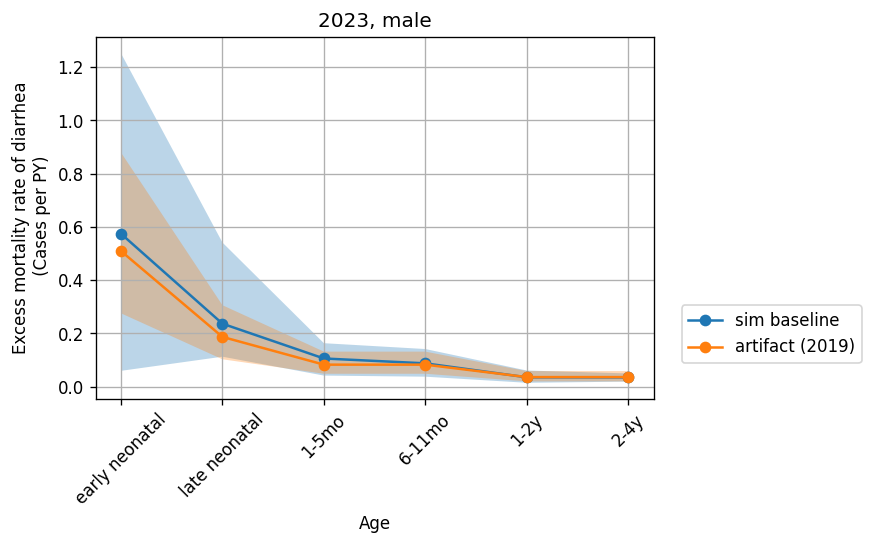

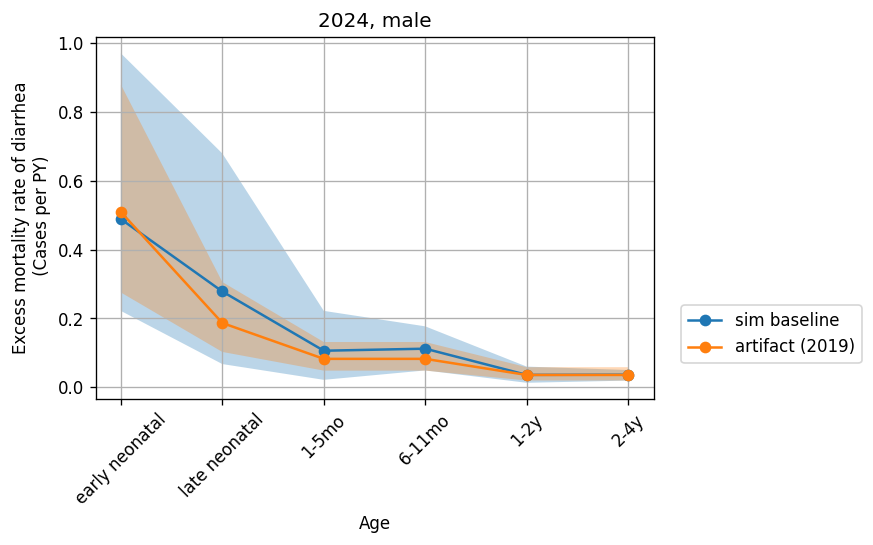

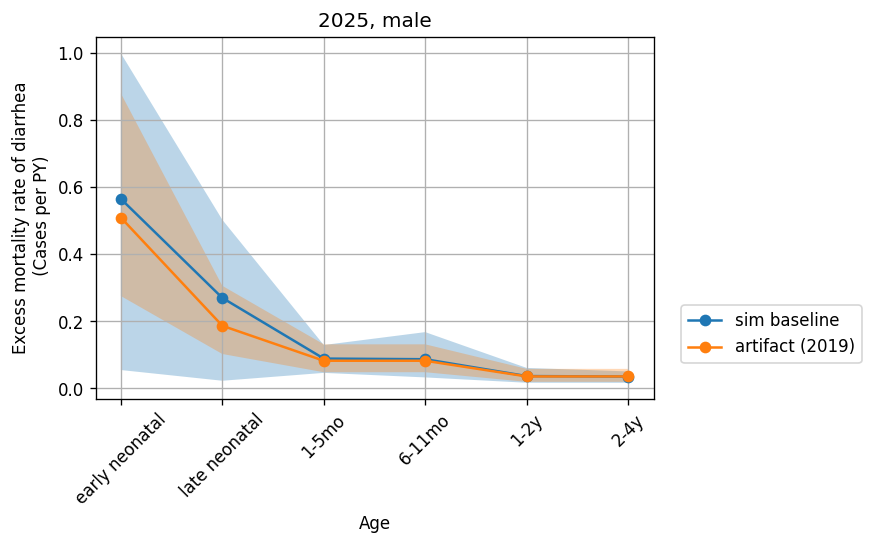

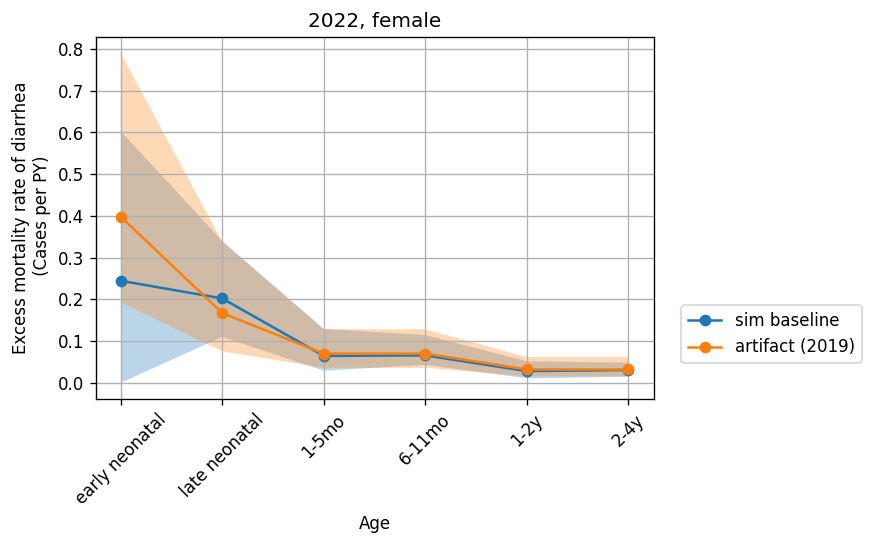

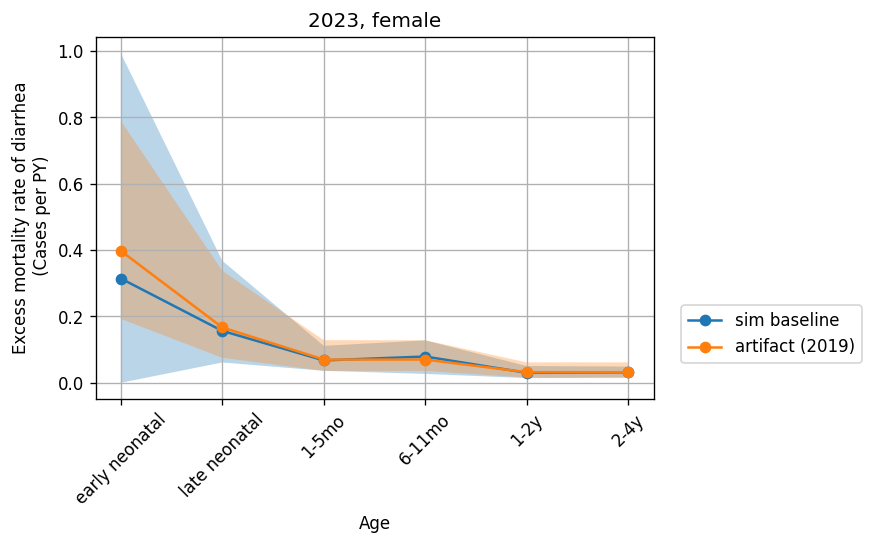

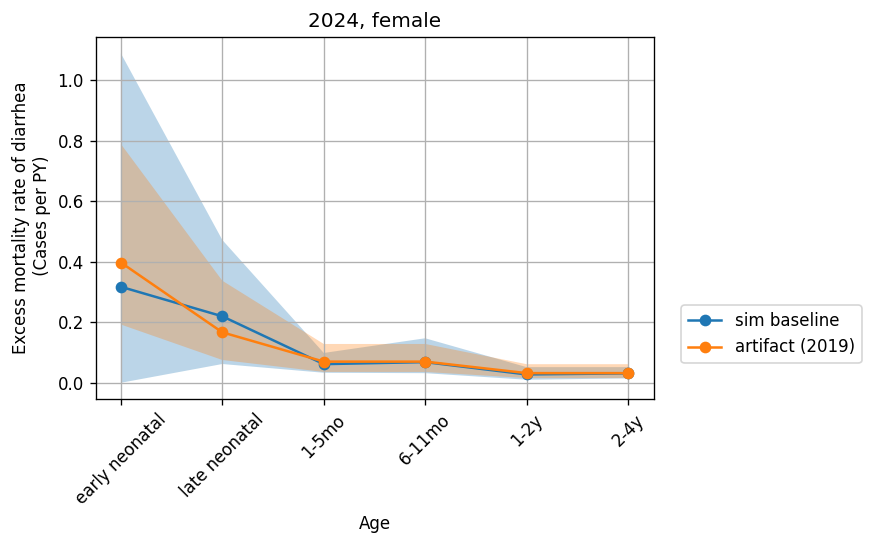

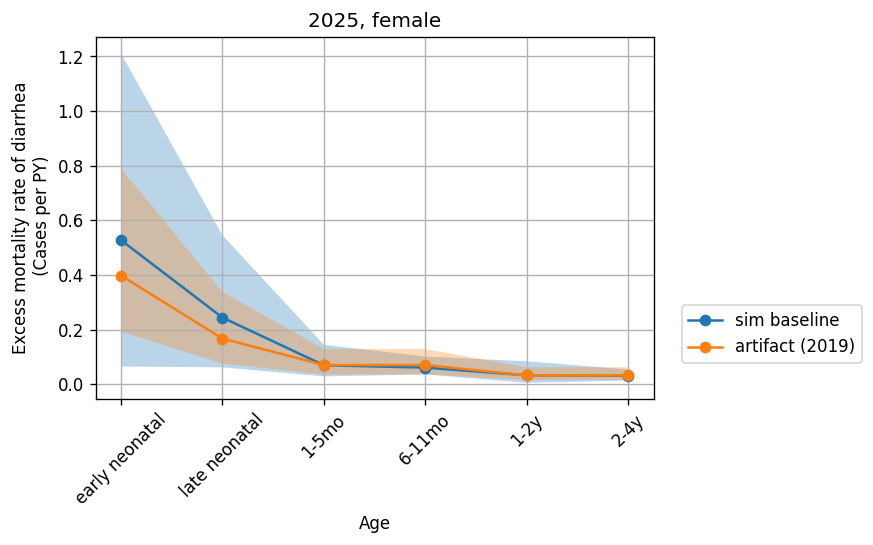

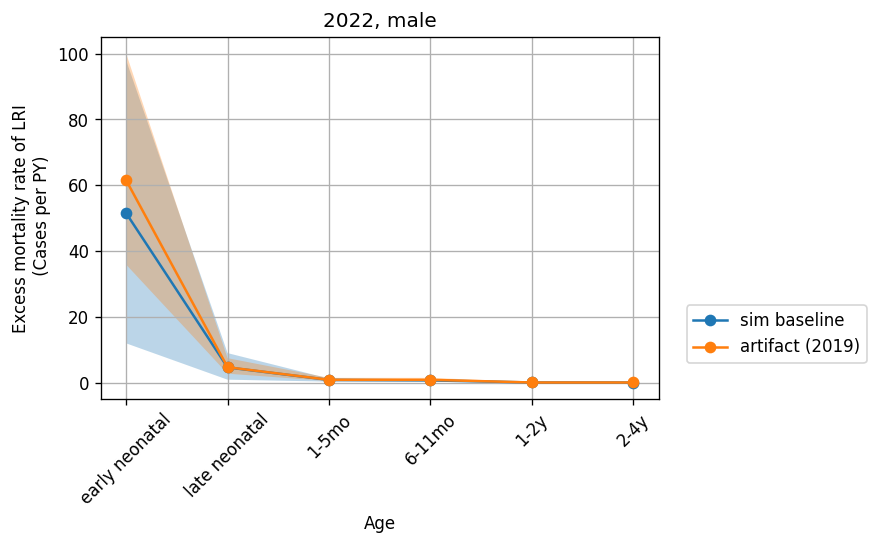

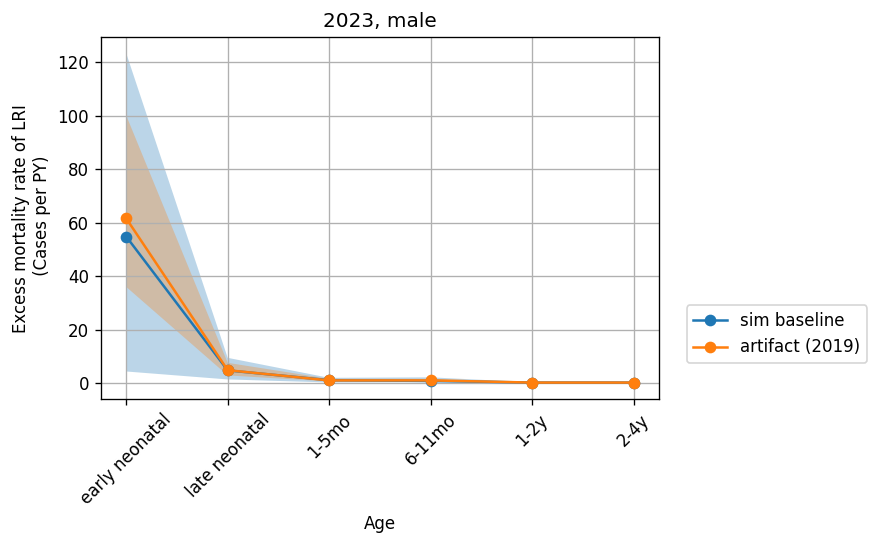

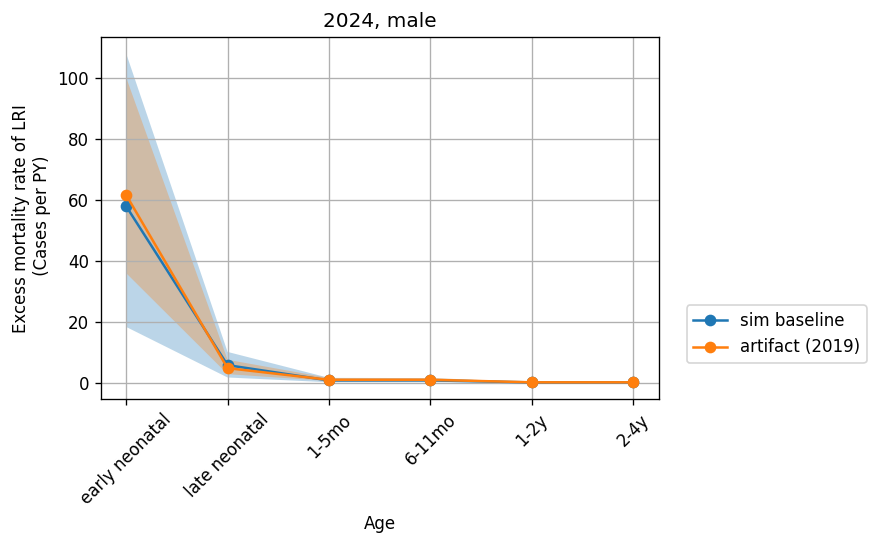

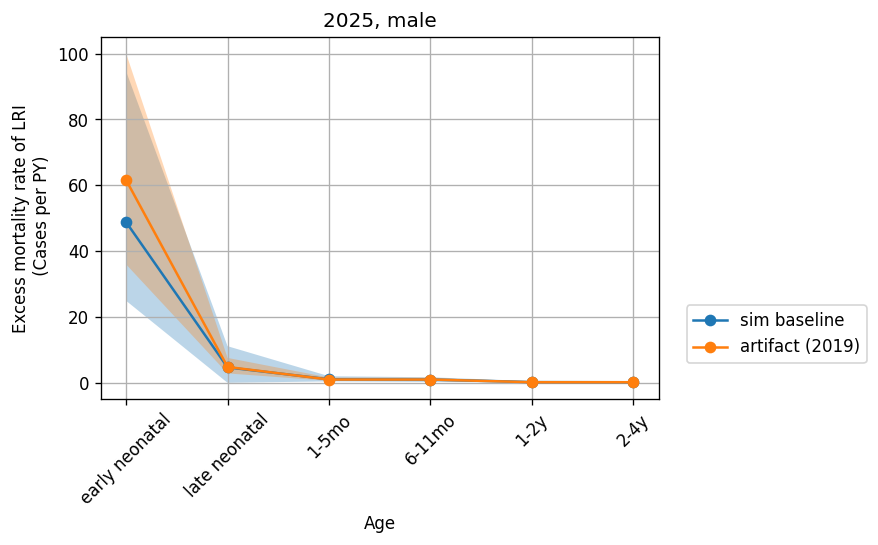

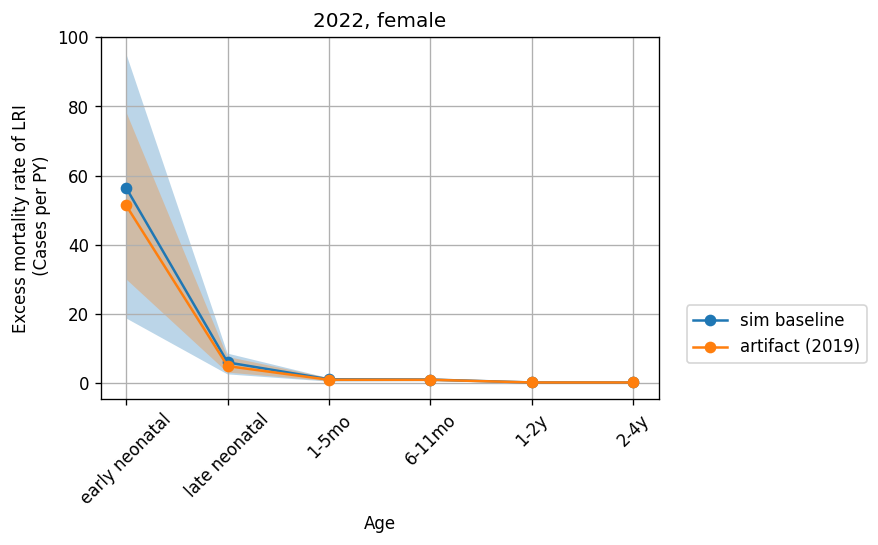

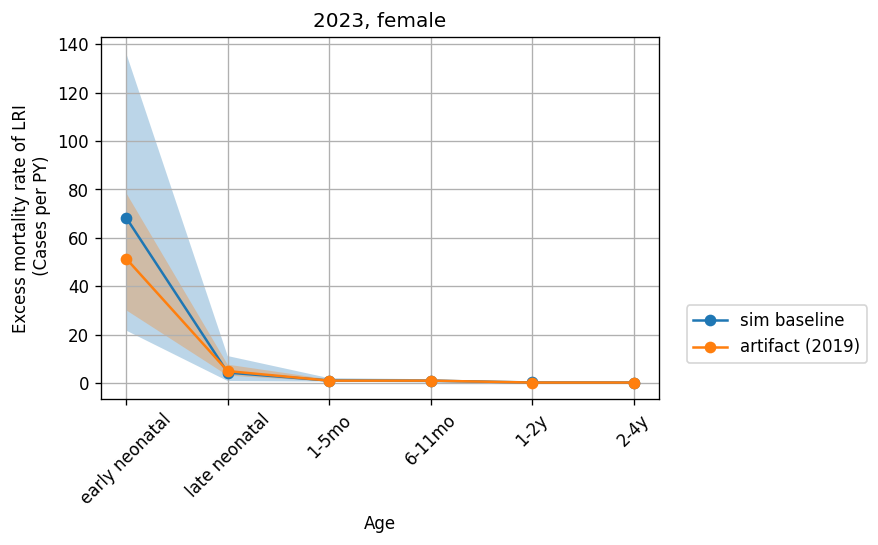

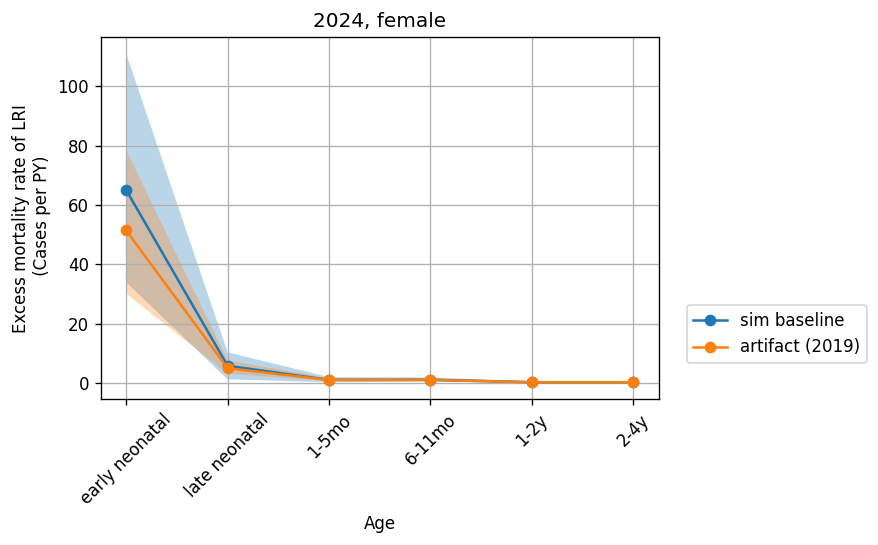

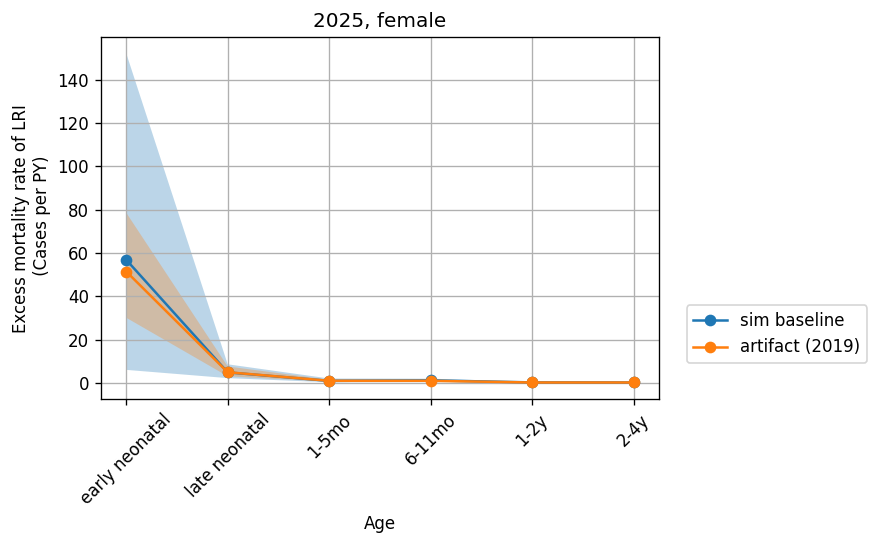

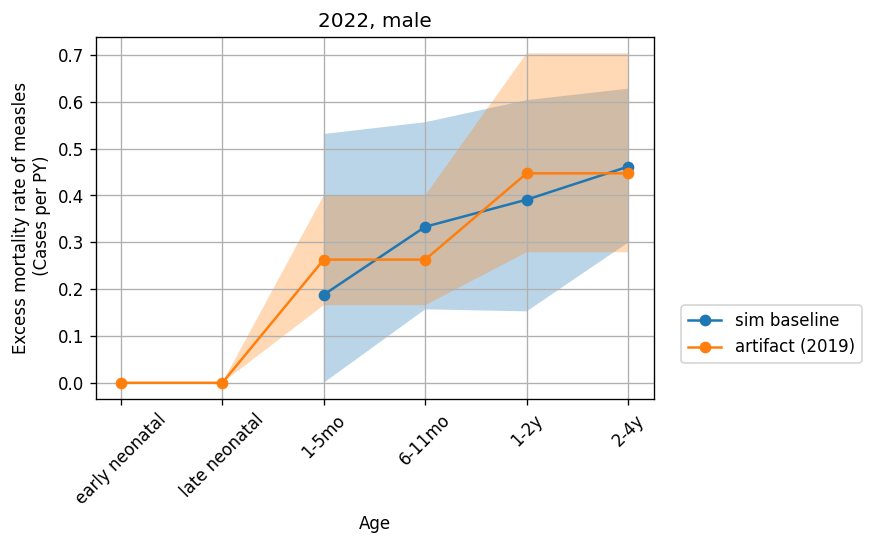

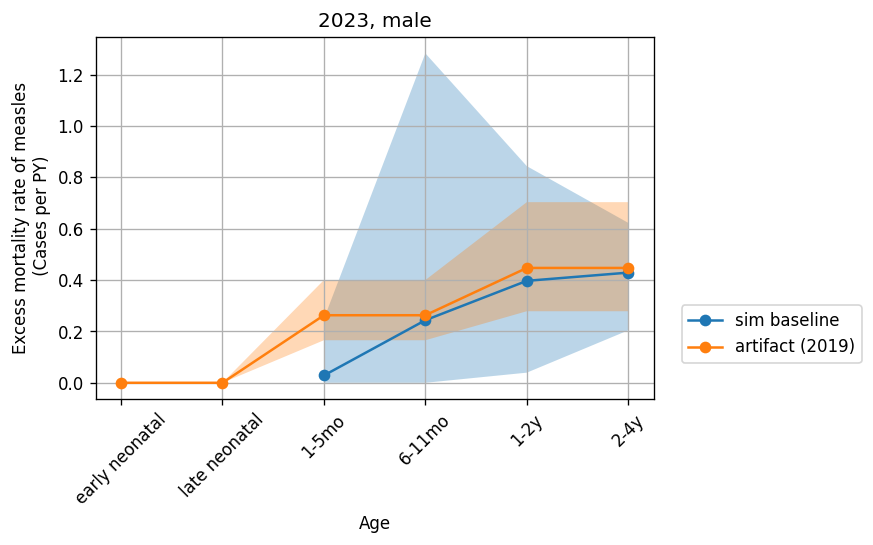

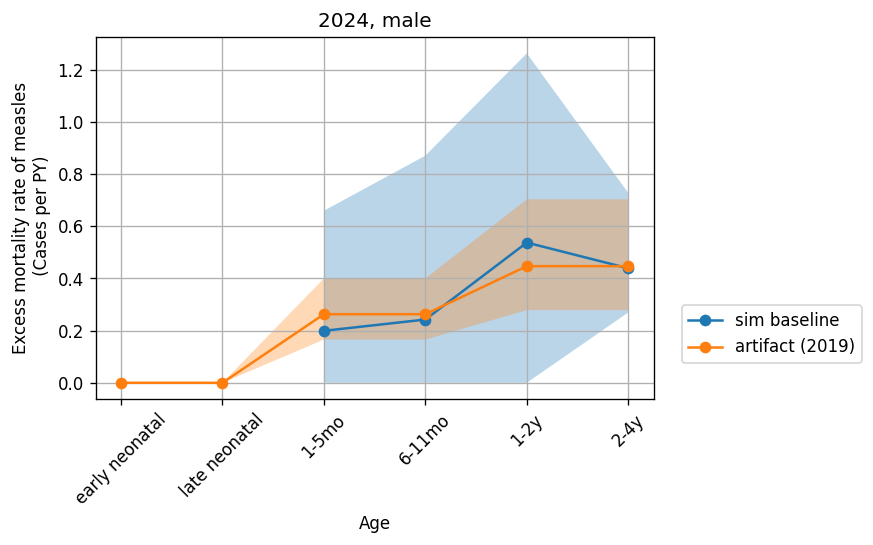

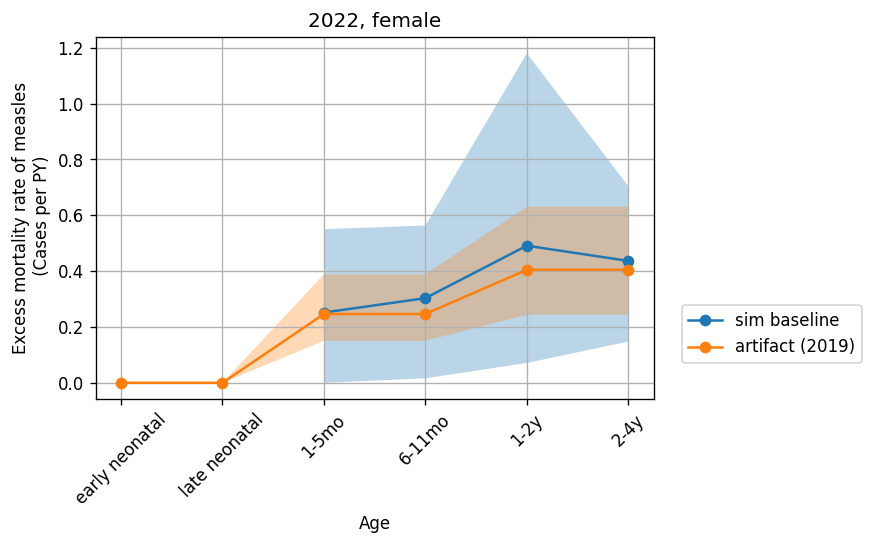

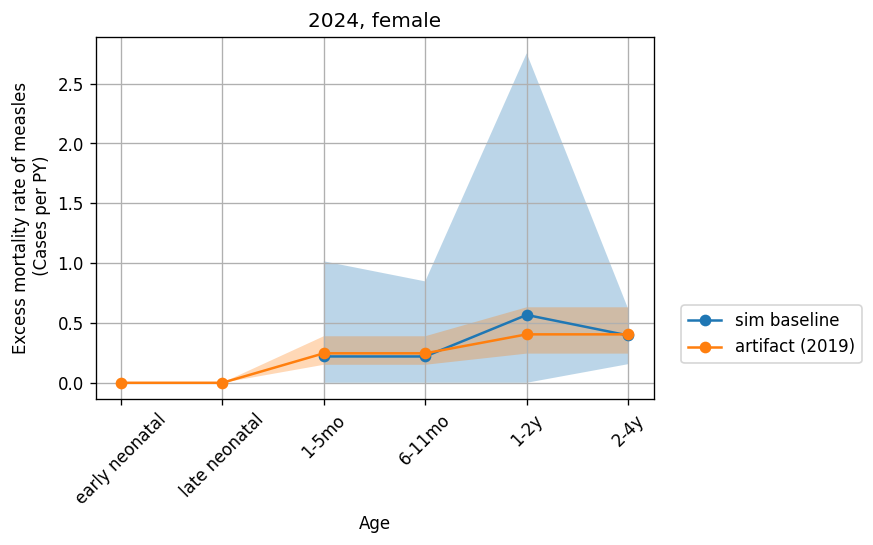

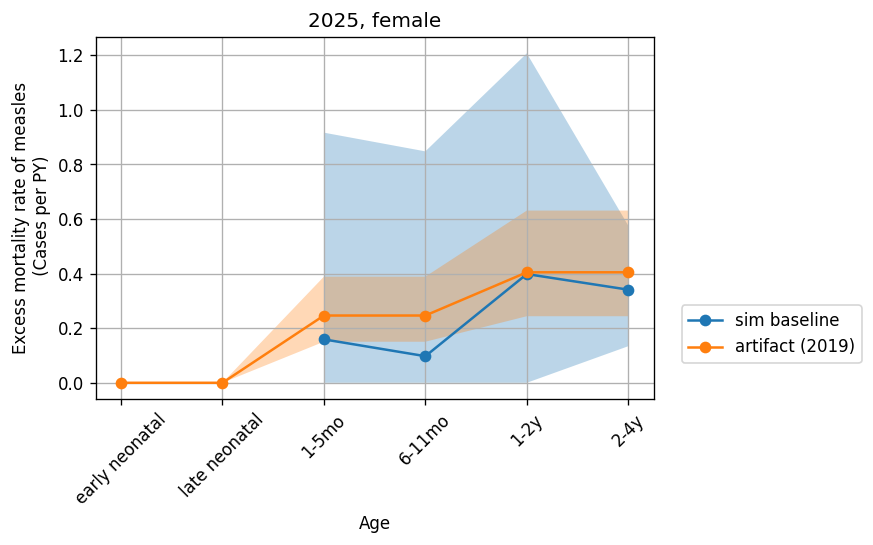

In [95]:
with PdfPages(output_dir + 'diarrhea_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_dd, art_emr_dd, sim_year, 2019, sex, 'emr_dd')    
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_lri, art_emr_lri, sim_year, 2019, sex, 'emr_lri')      
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'measles_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_msls, art_emr_msls, sim_year, 2019, sex, 'emr_msls')        
            pdf.savefig(bbox_inches='tight')

In [96]:
ls /share/scratch/users/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/v2.1_gbd_2020_wasting/

all_cause_mortality.pdf  diarrhea_remission.pdf  lri_remission.pdf
diarrhea_emr.pdf         lri_emr.pdf             measles_emr.pdf
diarrhea_incidence.pdf   lri_incidence.pdf       measles_incidence.pdf
diarrhea_mortality.pdf   lri_mortality.pdf       measles_mortality.pdf
diarrhea_prevalence.pdf  lri_prevalence.pdf      measles_prevalence.pdf


================================== END ==============================================